# Imports y Preparacion del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.preprocessing as skp
import scipy.stats as stats
import scipy as sc
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

#joblib
#from joblib import dump, load
import joblib

# multivariado   
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import DistanceMetric

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve, 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/hotels_train.csv') 
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/hotels_test.csv') 
#f = pd.read_csv("/content/hotels_train.csv")
df_original = df.copy()

# a) Exploracion Inicial

Realizamos un analisis del dataset

In [ ]:
df.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   agent company days_in_waiting_list    customer_type    adr  \
0    9.0     NaN                    0        Transient  115.5   
1    NaN     NaN                    0        Transient   42.0   
2    9.0     NaN                    0        Transient  229.0   
3  154.0     NaN                    0        Transient   75.0   
4   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 32 columns]

In [ ]:
print("La cant de filas del dataset es: ", df.shape[0])
print("La cant de columnas del dataset es: ", df.shape[1])

La cant de filas del dataset es:  61913
La cant de columnas del dataset es:  32


In [ ]:
list(df.columns)

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

Vemos poco descriptiva la variable adr, por lo que le cambiamos el nombre

In [ ]:
columnas = {"adr": "average_daily_rate", "arrival_date_year":"year", "arrival_date_month":"month", "arrival_date_day_of_month":"day"} #cambiar nombres a las categorias
df.rename(columns = columnas, inplace = True)
df.head(3)

hotel  lead_time  year      month  arrival_date_week_number  day  \
0    City Hotel         49  2016  September                        37    5   
1  Resort Hotel          4  2015    October                        44   31   
2    City Hotel         25  2016    October                        42   13   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   

   agent company days_in_waiting_list customer_type average_daily_rate  \
0    9.0     NaN                    0     Transient              115.5   
1    NaN     NaN                    0     Transient               42.0   
2    9.0     NaN                    0     Transient              229.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  

[3 rows x 32 columns]

## ● Tipo de variable

In [ ]:
df.dtypes

hotel                              object
lead_time                           int64
year                                int64
month                              object
arrival_date_week_number            int64
day                                 int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

## ●  Variables Cuantitativas

Las variables **cuantitativas** observadas del  dataset son: 
- lead time  (soporte continuo)
- stays_in_weekend_nights (rango discreto)
- stays_in_week_nights (rango discreto)
- adults (rango discreto)
- children  (rango discreto)
- babies (rango discreto)
- previous_cancellations 
- previous_bookings_not_canceled
- booking_changes 
- days_in_waiting_list 
- average daily rate
- required_car_parking_spaces
- total_of_special_requests


In [ ]:
variables_cuantitativas = ['lead_time', 'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes', 'days_in_waiting_list','average_daily_rate','required_car_parking_spaces','total_of_special_requests']
df[variables_cuantitativas].describe()

lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  61913.000000             61913.000000          61913.000000   
mean     112.248187                 0.924135              2.510054   
std      110.717953                 0.993101              1.884926   
min        0.000000                 0.000000              0.000000   
25%       23.000000                 0.000000              1.000000   
50%       78.000000                 1.000000              2.000000   
75%      172.000000                 2.000000              3.000000   
max      629.000000                16.000000             40.000000   

             adults      children        babies  previous_cancellations  \
count  61913.000000  61909.000000  61913.000000            61913.000000   
mean       1.862791      0.104896      0.007155                0.114790   
std        0.589066      0.402847      0.092158                0.993723   
min        0.000000      0.000000      0.000000                0.000000   
25%        2.000000      0.000000      0.000000                0.000000   
50%        2.000000      0.000000      0.000000                0.000000   
75%        2.000000      0.000000      0.000000                0.000000   
max       55.000000     10.000000      9.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    61913.000000     61913.000000          61913.000000   
mean                         0.115420         0.195952              2.638977   
std                          1.396359         0.610519             18.619092   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         70.000000        17.000000            391.000000   

       average_daily_rate  required_car_parking_spaces  \
count        61913.000000                 61913.000000   
mean           102.383773                     0.049957   
std             47.757640                     0.221023   
min             -6.380000                     0.000000   
25%             70.000000                     0.000000   
50%             95.000000                     0.000000   
75%            126.000000                     0.000000   
max            510.000000                     8.000000   

       total_of_special_requests  
count               61913.000000  
mean                    0.523703  
std                     0.775412  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     5.000000

## ●  Variables Cualitativas

Las variables **cualitativas** observadas del dataset son:
-  hotel
- meal 
- country
- market_segment 
- distribution_channel 
- reserved_room_type
- assigned_room_type
- deposit_type
- customer_type
- reservation_status_date 
- is_canceled
- agent
- is_repeated_guest


.Reportar los posibles valores que toman y cuán frecuentemente lo hacen. 


In [ ]:
print('Tipos de hotel')
print(df['hotel'].value_counts())

Tipos de hotel
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64


In [ ]:
print('Meses de llegada')
print(df['month'].value_counts())

Meses de llegada
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: month, dtype: int64


In [ ]:
print(df['country'].unique()) #Vemos los paises de llegada registrados

['USA' 'PRT' 'CHE' 'FRA' 'AGO' 'GBR' 'DEU' 'ESP' 'ROU' 'SWE' 'IRL' 'CN'
 'ITA' 'NLD' 'NOR' 'MAR' 'IND' 'BEL' 'ISR' 'KOR' 'TUN' 'JPN' 'FIN' 'TUR'
 'CHN' 'AUT' 'ZAF' 'LUX' 'BRA' 'POL' 'DNK' 'IRN' 'RUS' 'VEN' 'SEN' 'AUS'
 'MLT' 'BGR' 'THA' 'GEO' 'SRB' 'PHL' 'ARG' 'LVA' 'LTU' 'ARE' nan 'VNM'
 'MOZ' 'MEX' 'HUN' 'DZA' 'GAB' 'UKR' 'SVN' 'HRV' 'SVK' 'CHL' 'BLR' 'CPV'
 'CRI' 'EST' 'TWN' 'ALB' 'SGP' 'PRI' 'IDN' 'DOM' 'MUS' 'OMN' 'EGY' 'SAU'
 'NZL' 'FRO' 'CYP' 'PER' 'CZE' 'GRC' 'ARM' 'COL' 'PAK' 'MDG' 'HKG' 'MYS'
 'MKD' 'ISL' 'BIH' 'NGA' 'AZE' 'MAC' 'JEY' 'SUR' 'KWT' 'BGD' 'IRQ' 'MDV'
 'GGY' 'VGB' 'ECU' 'URY' 'ETH' 'LBN' 'BOL' 'QAT' 'JOR' 'COM' 'GNB' 'MYT'
 'UGA' 'BEN' 'GIB' 'KAZ' 'TZA' 'LBY' 'SYC' 'PRY' 'MNE' 'ZWE' 'CAF' 'ATA'
 'MWI' 'JAM' 'AND' 'LIE' 'FJI' 'TJK' 'LKA' 'HND' 'PAN' 'CMR' 'KNA' 'KEN'
 'UMI' 'PYF' 'GLP' 'BRB' 'CIV' 'ZMB' 'CUB' 'TGO' 'SYR' 'SDN' 'NAM' 'GHA'
 'GTM' 'BHR' 'STP' 'MCO' 'IMN' 'RWA']


In [ ]:
print('Paises de origen')  
print(df['country'].value_counts().head(30)) #Veo los 30 paises de origen mas frecuentes
#print(df['country'].value_counts())

Paises de origen
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
ROU      246
AUS      217
AGO      200
DNK      197
FIN      191
LUX      150
MAR      135
TUR      134
HUN      122
ARG      106
Name: country, dtype: int64


In [ ]:
print('Tipos de comida reservada') #CAMBIAR en el paper dice: Undefined/SC – no meal package, tendriamos que corregir y ponerle al undefined SC
print(df['meal'].value_counts())

Tipos de comida reservada
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64


In [ ]:
#CAMBIO EL UNDEFINED A SC :)
df.loc[df.loc[:,"meal"]=='Undefined',"meal"]="SC"
print(df['meal'].value_counts())

BB    47837
HB     7452
SC     6147
FB      477
Name: meal, dtype: int64


In [ ]:
print('Segmento de mercado que pertenece el cliente')
print(df['market_segment'].value_counts()) #Aca podemos ver que hay 2 undefined a tratar mas adelante

Segmento de mercado que pertenece el cliente
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64


In [ ]:
print('Canal de distribucion en el que realiza la reserva')
print(df['distribution_channel'].value_counts()) #ANALISIS DE LOS 4 UNDEFINED

Canal de distribucion en el que realiza la reserva
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64


In [ ]:
print('Tipo de habitacion reservada')
print(df['reserved_room_type'].value_counts())

Tipo de habitacion reservada
A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64


In [ ]:
print('Tipo de habitacion asignada')  #OJO PODEMOS HACER UNA EVALUACION ENTRE reserved_room_type y assigned_room_type
print(df['assigned_room_type'].value_counts())

Tipo de habitacion asignada
A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64


In [ ]:
print('Tipo de deposito')  
print(df['deposit_type'].value_counts())

Tipo de deposito
No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64


In [ ]:
print('Tipo de cliente')  
print(df['customer_type'].value_counts())

Tipo de cliente
Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64


In [ ]:
print(df['agent'].unique()) #Mosotramos todos los ID de los agentes en que se realizo la reserva

[  9.  nan 154.  20. 314. 240.  58. 250.  86. 229.   1.  33.   8.   3.
 236. 177.  38.  39. 170. 410.  85.  26.  96.  14. 134.  56. 234. 468.
 254. 147.  34. 138.  40.  29. 315.  37. 195. 326.  35. 208.  22.  17.
 296.  28.   6.  19.  98.  83. 298.  27. 378. 484.   7.  16.  21. 175.
 171. 243.  41.  45.  11. 157. 273.  12. 387. 368. 434.   5.  36. 436.
 405. 191. 257.  95.  15.  31. 440.  50. 241.   4.  67.  63. 168.  44.
 261. 281.  94. 336.  30. 420. 104. 121. 464. 196. 142. 151. 242. 119.
 339. 310. 531. 305.   2.  53.  64. 248. 313. 364. 286. 459. 133. 132.
 245. 143.  52. 155. 251. 223. 156. 159. 185. 323.  13. 330. 359. 527.
 103.  68. 174.  82.  42. 256. 483. 146.  89. 252. 220.  88. 303. 181.
 152.  24. 394.  75. 306. 183.  69.  10. 184. 149. 162. 139.  99. 418.
  71. 481. 493. 360. 115. 334.  47. 375. 341. 354. 214. 350.  87.  78.
 126.  79. 348.  60. 332. 430. 474. 495. 163. 112. 423.  66.  55. 324.
 270. 455. 219. 390.  91. 404. 355.  92. 253. 414. 192. 385. 307. 180.
 308. 

In [ ]:
print('ID ddel agente en que se hizo la reserva')  
print(df['agent'].value_counts().head(20)) #Vemos los 20 ID de agentes mas frecuentes

ID ddel agente en que se hizo la reserva
9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
7.0       1581
250.0     1346
241.0      770
3.0        739
8.0        732
37.0       726
28.0       696
19.0       662
21.0       547
40.0       455
314.0      449
229.0      448
29.0       421
242.0      388
12.0       334
Name: agent, dtype: int64


In [ ]:
print('Es cliente repetido')  
print(df['is_repeated_guest'].value_counts())

Es cliente repetido
0    60180
1     1733
Name: is_repeated_guest, dtype: int64


## ● Determinar si existen variables irrelevantes para el análisis 

In [ ]:
#filas_totales=df.shape[0]
#print(df.isna().sum()/filas_totales*100) #Esto va mas en datos faltantes
df.columns.values

array(['hotel', 'lead_time', 'year', 'month', 'arrival_date_week_number',
       'day', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled'], dtype=object)

Podemos obviar la columna
reservation_status_date no aporta info ya que se elimina reservation_status
arrival_date_week_number no es relevante para el analisis ya que no aporta mas informacion que la fecha de llegada

In [ ]:
df = df.drop(columns=['arrival_date_week_number'])


## ● Análisis gráfico de las distribuciones de las variables

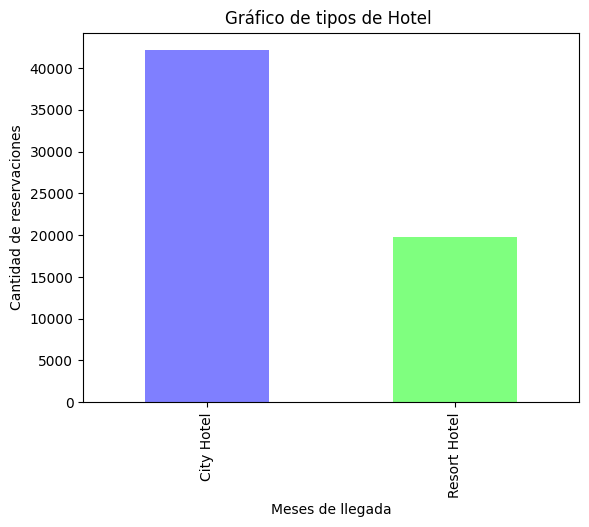

In [ ]:
colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]
gr=df['hotel'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipos de Hotel ", xlabel="Meses de llegada",ylabel="Cantidad de reservaciones")

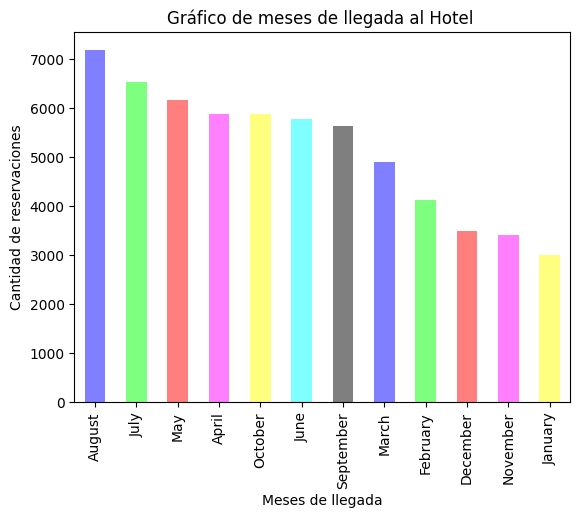

In [ ]:
gr=df['month'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de meses de llegada al Hotel ", xlabel="Meses de llegada",ylabel="Cantidad de reservaciones")

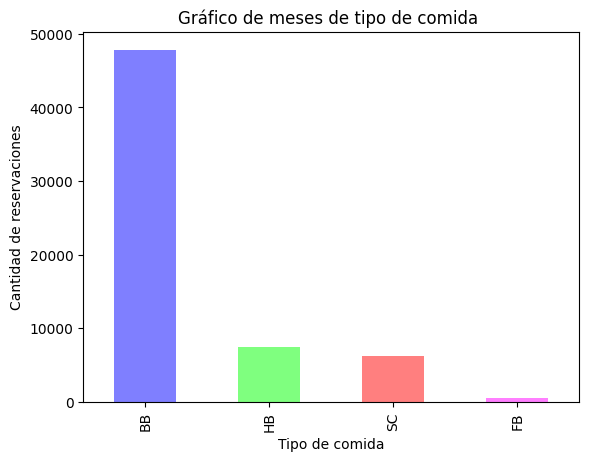

In [ ]:
gr=df['meal'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de meses de tipo de comida ", xlabel="Tipo de comida",ylabel="Cantidad de reservaciones")

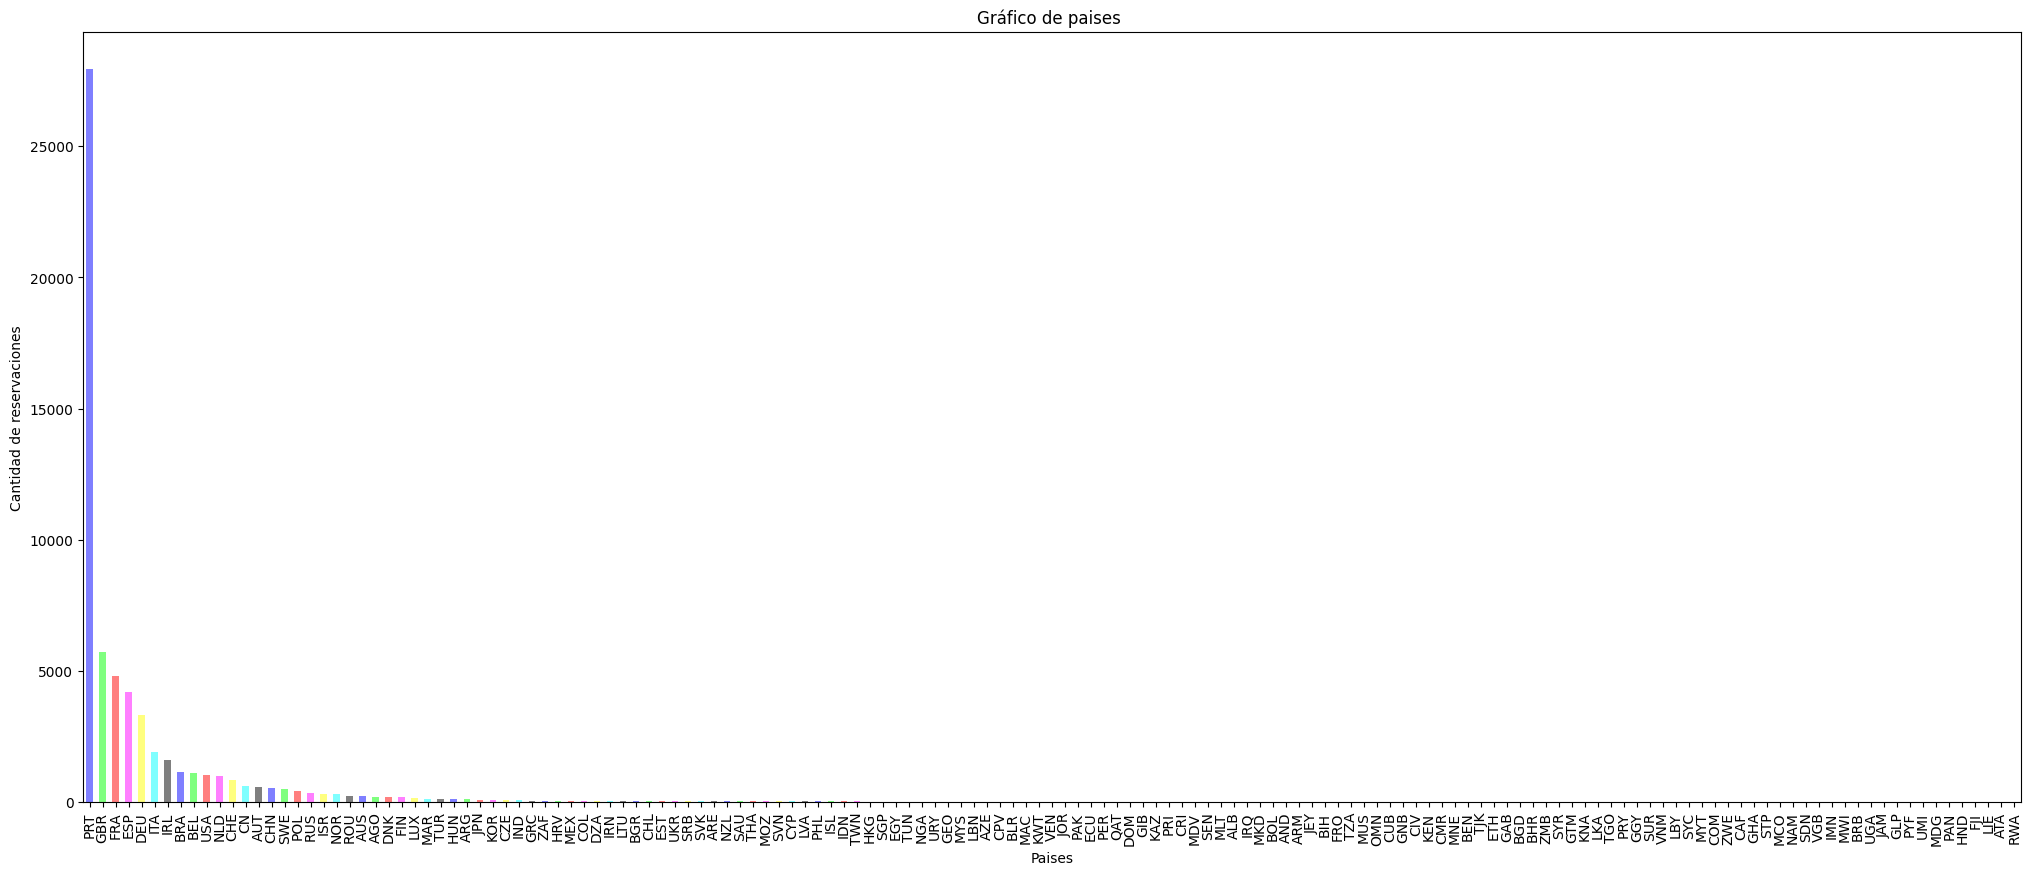

In [ ]:
#Parece que se necesita otro grafico!! PARECE QUE UN TREEMAP 

"""
#eje_y = ds_agrupado_Pclass['Survived'].tolist() 
sizes= (df["country"]).value_counts() # proportions of the categories

label=df["country"].unique()

squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()  #TREE MAP TIRA ERROR PORQUE labels=150 y bars=149, dado que tengo datos faltantes 
"""
#gr=df['country'].value_counts().sort_values(ascending=False).plot.bar(figsize=(25,10), xlabel="Pais",ylabel="Frecuencia")
plt.figure(figsize=(25, 10))
gr=df['country'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de paises ", xlabel="Paises",ylabel="Cantidad de reservaciones")


In [ ]:
df_country = df.copy()
df_country['country'].value_counts().head(20)

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
Name: country, dtype: int64

In [ ]:
paises_comunes = ['PRT','GBR','FRA','ESP','DEU','ITA','IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'CHN', 'SWE', 'POL', 'RUS', 'ISR', 'NOR']
df.loc[~df.loc[:,"country"].isin(paises_comunes),"country"]="OTHER"


In [ ]:
df['country'].value_counts()

PRT      27950
GBR       5733
FRA       4809
ESP       4210
OTHER     3650
DEU       3312
ITA       1911
IRL       1617
BRA       1152
BEL       1124
USA       1021
NLD        982
CHE        847
CN         597
AUT        581
CHN        545
SWE        481
POL        430
RUS        337
ISR        322
NOR        302
Name: country, dtype: int64

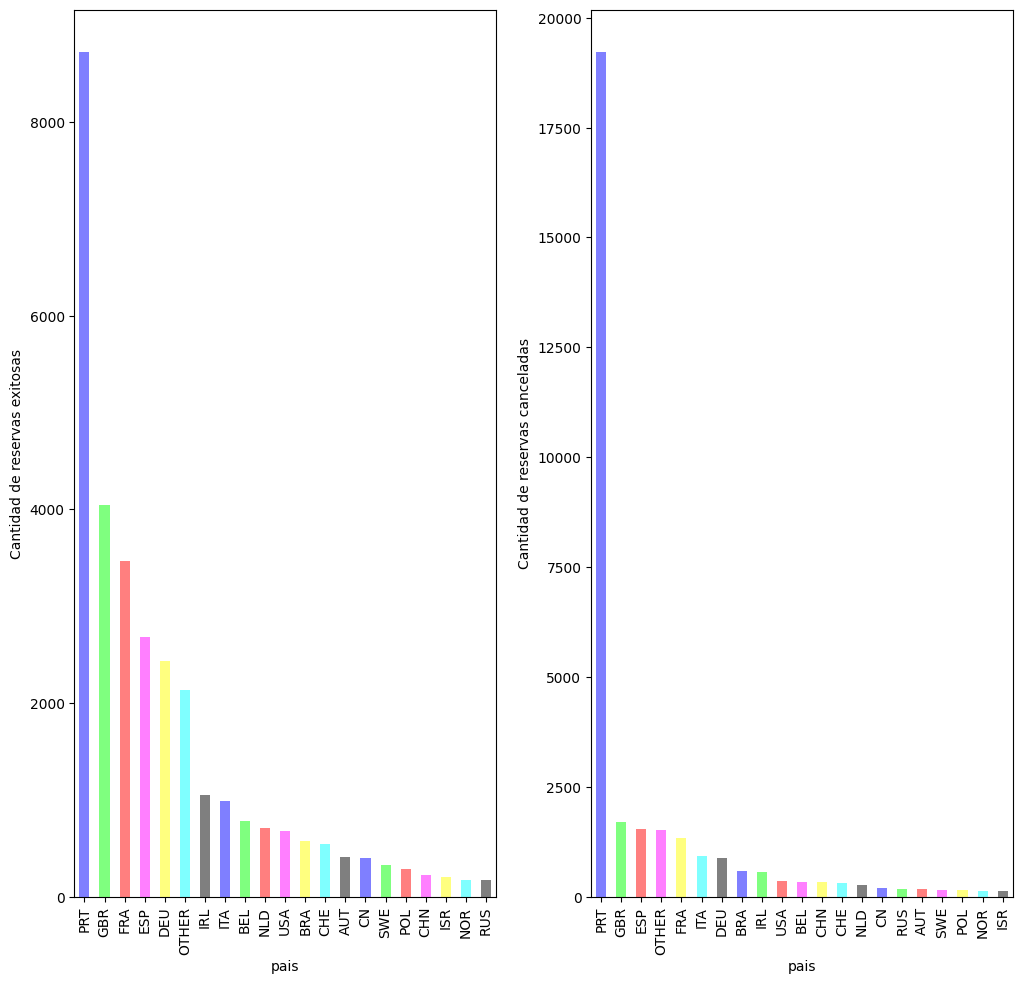

In [ ]:
df_country_canceled = df[df['is_canceled'] == 1]
df_country_not_canceled = df[df['is_canceled'] == 0]

fig, ax = plt.subplots(1,2, figsize=(10,10)) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df_country_canceled['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas canceladas")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df_country_not_canceled['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas exitosas")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

<Axes: xlabel='pais', ylabel='Cantidad de reservas'>

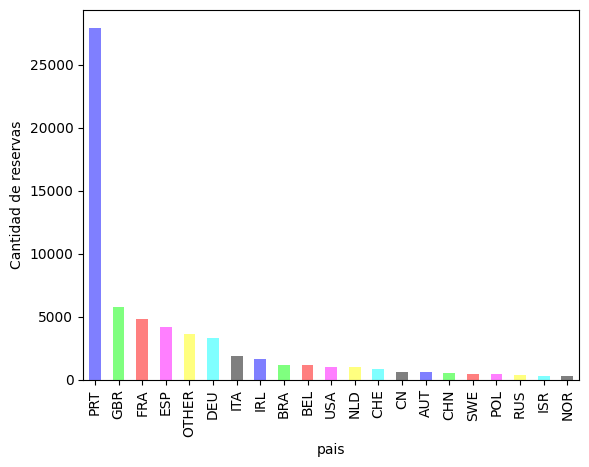

In [ ]:
df['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas")

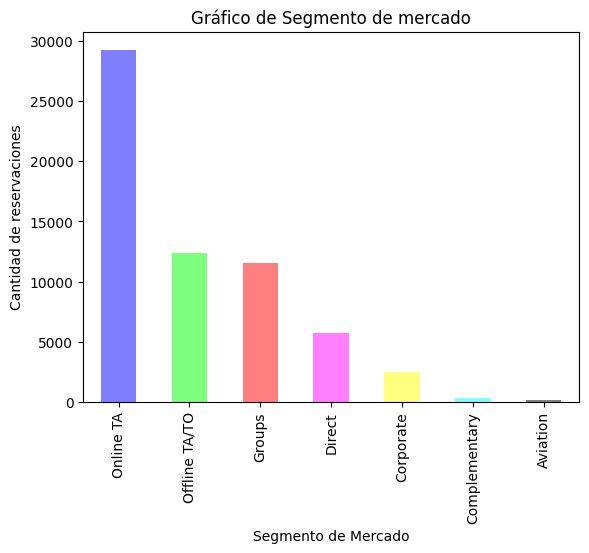

In [ ]:
#TENEMOS QUE VER LOS 2 UNDEFINED 
df.drop(df[df['market_segment']=='Undefined'].index, axis='index',inplace=True) #elimino los undefined dado que solo son 2
gr=df['market_segment'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de Segmento de mercado", xlabel="Segmento de Mercado",ylabel="Cantidad de reservaciones")

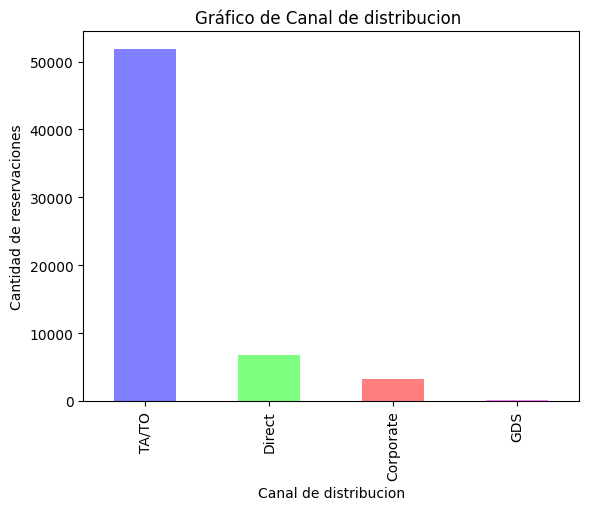

In [ ]:
df.drop(df[df['distribution_channel']=='Undefined'].index, axis='index',inplace=True) #elimino los undefined dado que solo son 4
gr=df['distribution_channel'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de Canal de distribucion ", xlabel="Canal de distribucion",ylabel="Cantidad de reservaciones")

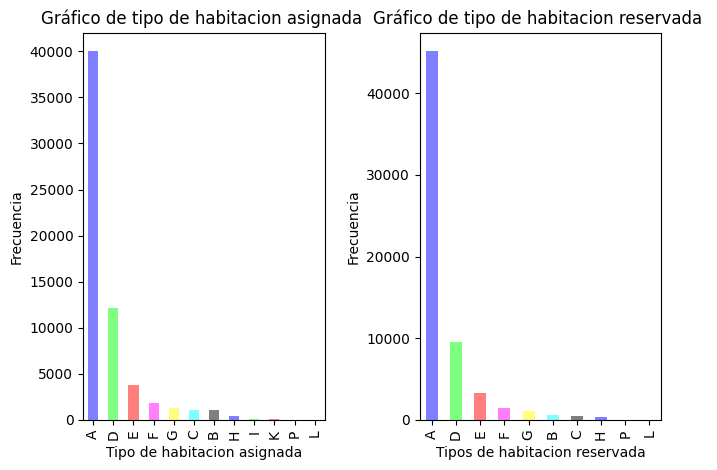

In [ ]:
fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['reserved_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion reservada ", xlabel="Tipos de habitacion reservada",ylabel="Frecuencia")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df['assigned_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion asignada ", xlabel="Tipo de habitacion asignada",ylabel="Frecuencia")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [ ]:
room_type_populares = ["A", "D", "E", "F", "G"]
df.loc[~df.loc[:,"assigned_room_type"].isin(room_type_populares),"assigned_room_type"]="O"
df.loc[~df.loc[:,"reserved_room_type"].isin(room_type_populares),"reserved_room_type"]="O"
df

hotel  lead_time  year      month  day  stays_in_weekend_nights  \
0        City Hotel         49  2016  September    5                        1   
1      Resort Hotel          4  2015    October   31                        0   
2        City Hotel         25  2016    October   13                        0   
3        City Hotel         26  2016   December   12                        2   
4        City Hotel        104  2017      March   19                        2   
...             ...        ...   ...        ...  ...                      ...   
61908  Resort Hotel         24  2017    January   27                        0   
61909    City Hotel          0  2016  September    2                        0   
61910    City Hotel         10  2017        May    8                        1   
61911  Resort Hotel        143  2015    October   10                        2   
61912    City Hotel         57  2016      April   17                        2   

       stays_in_week_nights  adults  children  babies  ...  agent company  \
0                         2       1       0.0       0  ...    9.0     NaN   
1                         1       2       0.0       0  ...    NaN     NaN   
2                         1       2       2.0       0  ...    9.0     NaN   
3                         5       2       0.0       0  ...  154.0     NaN   
4                         5       2       0.0       0  ...   20.0     NaN   
...                     ...     ...       ...     ...  ...    ...     ...   
61908                     2       2       0.0       0  ...  240.0     NaN   
61909                     1       1       0.0       0  ...    NaN     NaN   
61910                     2       1       0.0       0  ...    NaN   153.0   
61911                     5       2       0.0       0  ...   96.0     NaN   
61912                     5       2       0.0       0  ...    9.0     NaN   

      days_in_waiting_list    customer_type  average_daily_rate  \
0                        0        Transient              115.50   
1                        0        Transient               42.00   
2                        0        Transient              229.00   
3                        0        Transient               75.00   
4                        0  Transient-Party               75.00   
...                    ...              ...                 ...   
61908                    0        Transient               48.00   
61909                    0        Transient              149.00   
61910                    0        Transient               95.00   
61911                    0        Transient               36.05   
61912                    0        Transient              143.29   

       required_car_parking_spaces  total_of_special_requests  \
0                                0                          1   
1                                1                          0   
2                                0                          2   
3                                0                          0   
4                                0                          1   
...                            ...                        ...   
61908                            0                          1   
61909                            0                          0   
61910                            0                          0   
61911                            0                          0   
61912                            0                          0   

      reservation_status_date                                    id  \
0                  2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689   
1                  2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1   
2                  2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c   
3                  2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff   
4                  2017-03-26  28c75445-c603-413a-babf-ad377018b592   
...                       ...                                   ...   
61908              2017-01-23  32

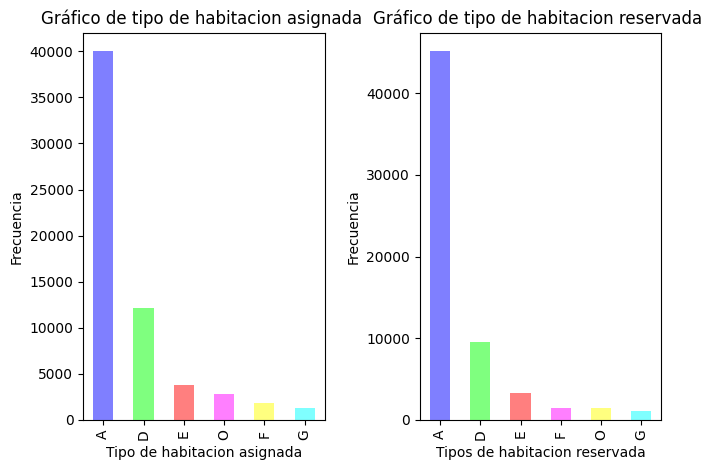

In [ ]:
fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['reserved_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion reservada ", xlabel="Tipos de habitacion reservada",ylabel="Frecuencia")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df['assigned_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion asignada ", xlabel="Tipo de habitacion asignada",ylabel="Frecuencia")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

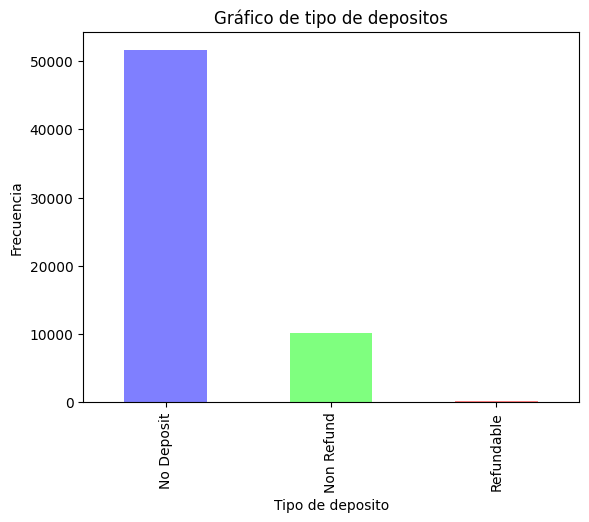

In [ ]:
gr=df['deposit_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de depositos", xlabel="Tipo de deposito",ylabel="Frecuencia")

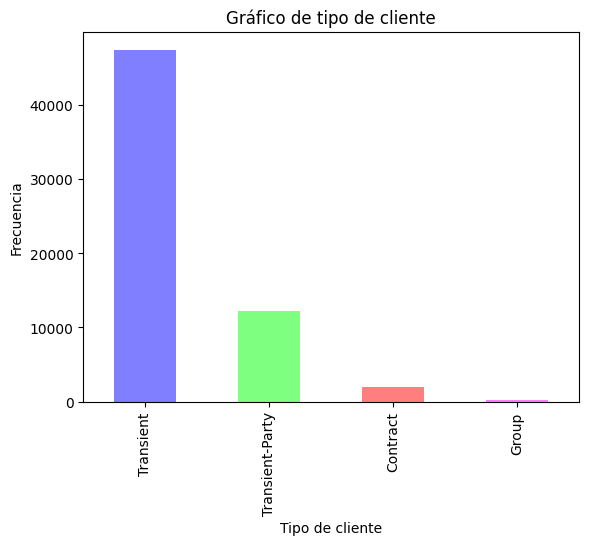

In [ ]:
gr=df['customer_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de cliente", xlabel="Tipo de cliente",ylabel="Frecuencia")

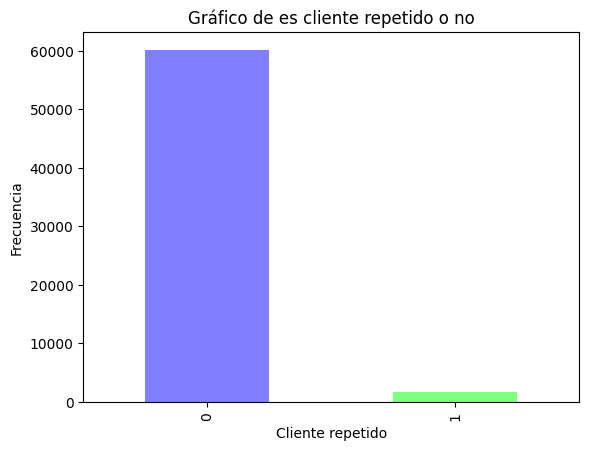

In [ ]:
gr=df['is_repeated_guest'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de es cliente repetido o no", xlabel="Cliente repetido",ylabel="Frecuencia")

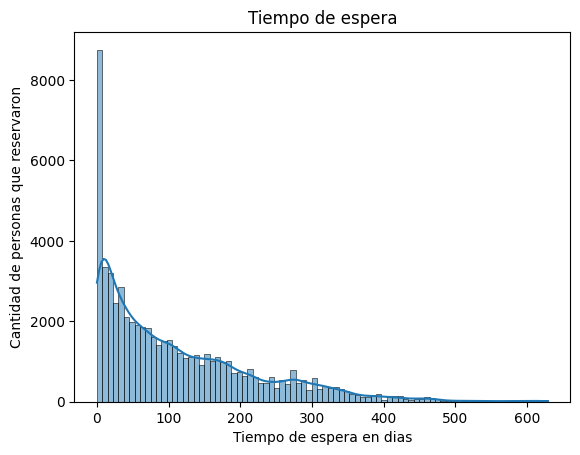

In [ ]:
#Graficamos las variables cuantitativas
#Vemos graficos de histogramas y densidad(histograma suavizado)
sns_hist=sns.histplot(data=df['lead_time'], kde=True, alpha = 0.5).set(title="Tiempo de espera",xlabel="Tiempo de espera en dias",ylabel="Cantidad de personas que reservaron")

(array([1]), [Text(1, 0, 'stays_in_weekend_nights')])

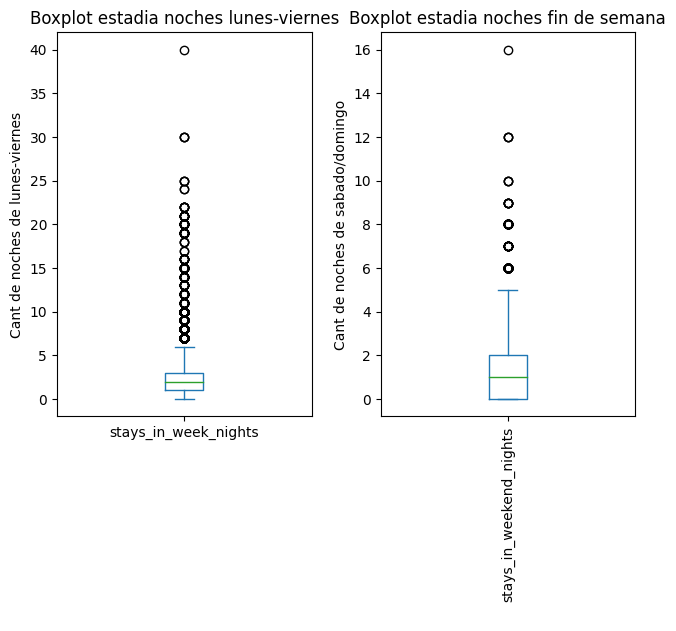

In [ ]:

#gr=df['stays_in_weekend_nights'].value_counts().plot.bar(alpha=0.5,title="Gráfico de tipo de depositos", xlabel="Tipo de deposito",ylabel="Frecuencia")
#Es de soprte discreto pero no llego a ver la distribucion en los ultimos por lo que decido
fig, ax = plt.subplots(1,2) #1 fila 2 col


grf=df['stays_in_weekend_nights'].plot.box(title="Boxplot estadia noches fin de semana",xlabel=" ",ylabel="Cant de noches de sabado/domingo")

plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots
grf=df['stays_in_week_nights'].plot.box(title="Boxplot estadia noches lunes-viernes",xlabel=" ",ylabel="Cant de noches de lunes-viernes")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)

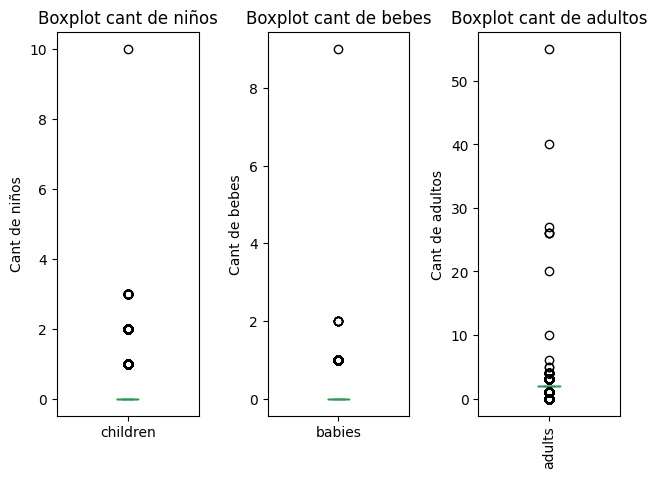

In [ ]:
fig, ax = plt.subplots(1,3) #1 fila 3 col


grf=df['adults'].plot.box(title="Boxplot cant de adultos",xlabel=" ",ylabel="Cant de adultos") 

plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()

grf=df['children'].plot.box(title="Boxplot cant de niños",xlabel=" ",ylabel="Cant de niños") 
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()

grf=df['babies'].plot.box(title="Boxplot cant de bebes",xlabel=" ",ylabel="Cant de bebes") 
plt.sca(ax[2])
plt.xticks(fontsize=10, rotation=90)
plt.show()
#Vemos que la mayoria de reservaciones a grandes rasgos son de 0 a 10 adultos

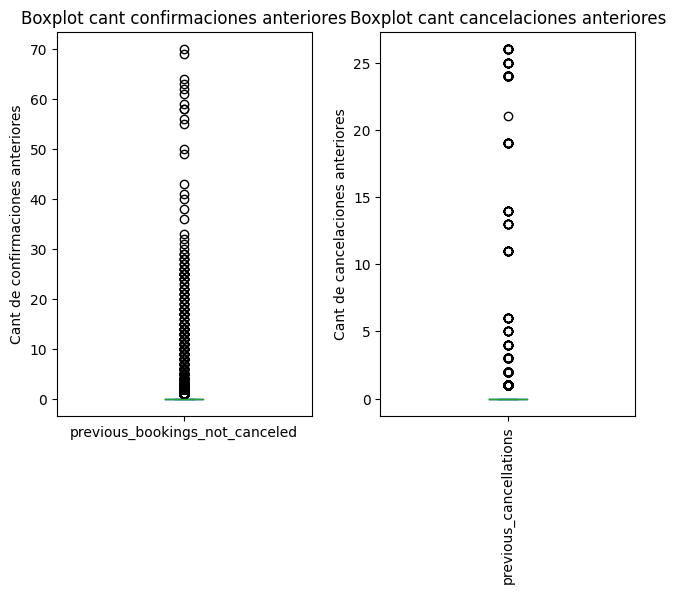

In [ ]:

fig, ax = plt.subplots(1,2) #1 fila 3 col


grf=df['previous_cancellations'].plot.box(title="Boxplot cant cancelaciones anteriores",xlabel=" ",ylabel="Cant de cancelaciones anteriores")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout()

grf=df['previous_bookings_not_canceled'].plot.box(title="Boxplot cant confirmaciones anteriores",xlabel=" ",ylabel="Cant de confirmaciones anteriores") 
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

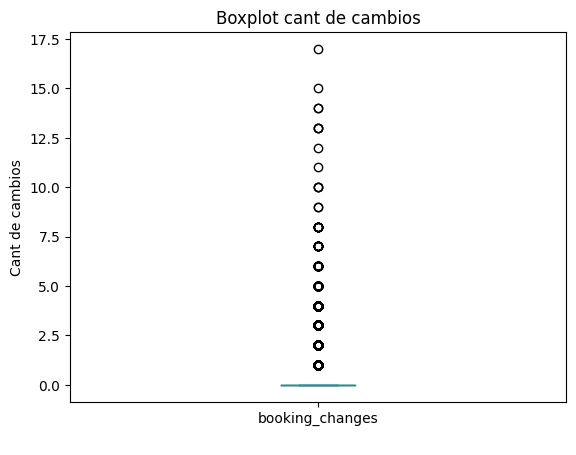

In [ ]:
grf=df['booking_changes'].plot.box(title="Boxplot cant de cambios",xlabel=" ",ylabel="Cant de cambios")

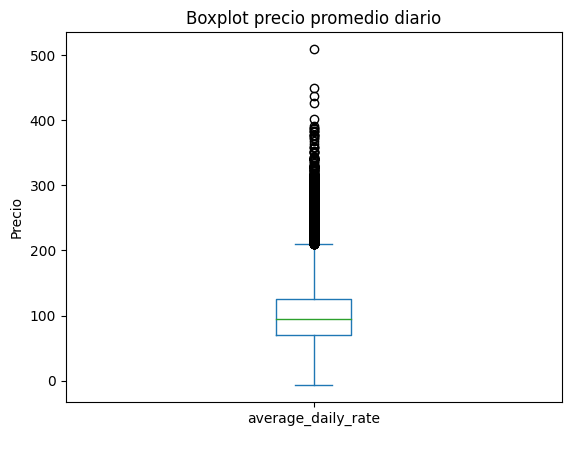

In [ ]:
grf=df['average_daily_rate'].plot.box(title="Boxplot precio promedio diario",xlabel=" ",ylabel="Precio")

## ● Analisis de las correlaciones existentes entre las variables

Correlacion de variables cuantitativas




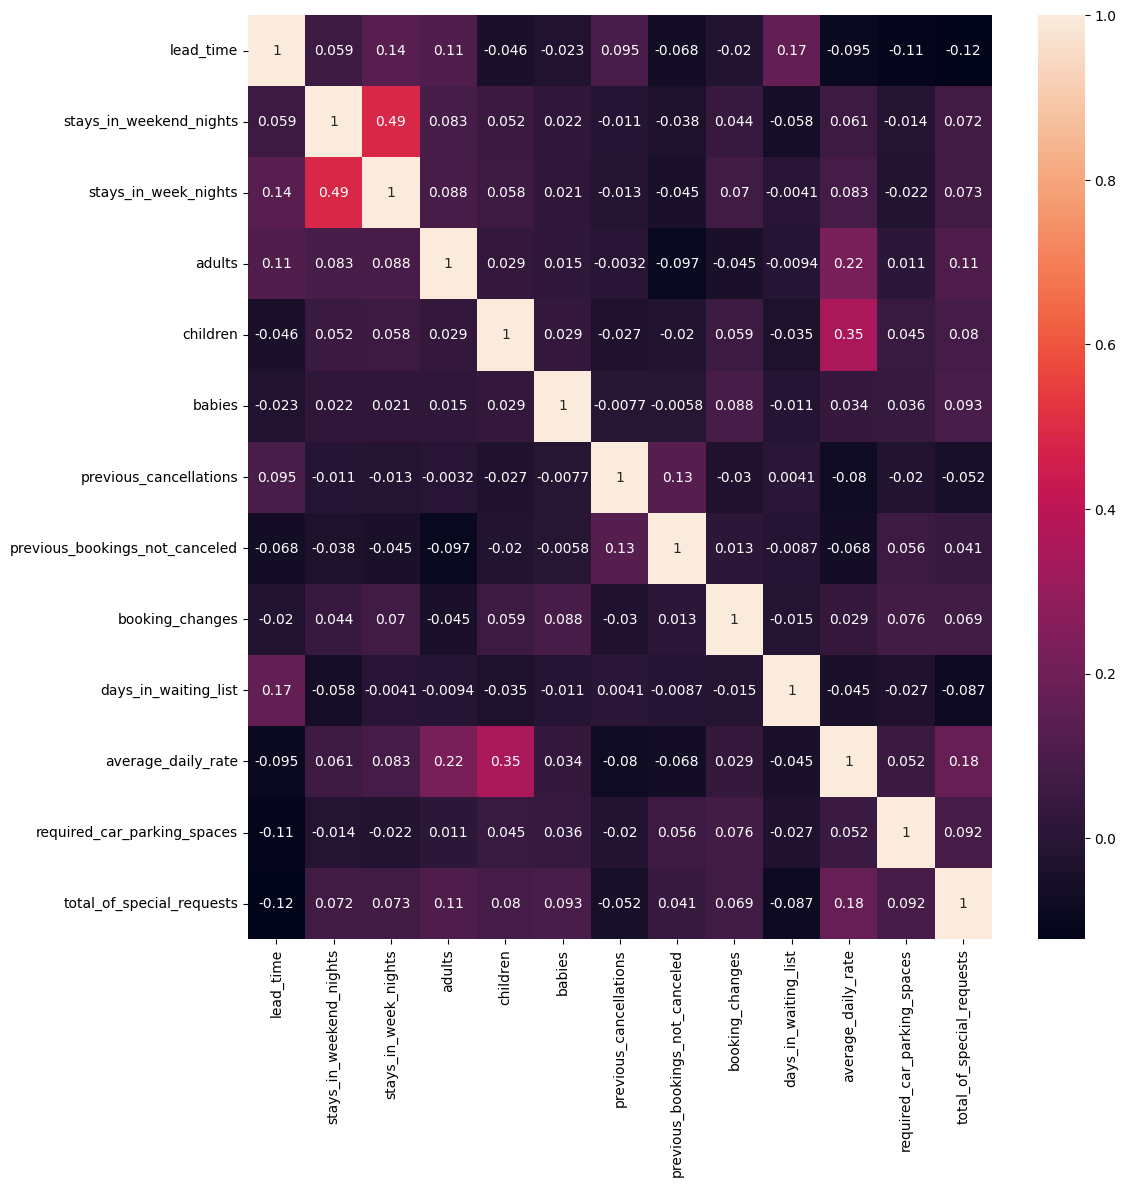

In [ ]:
#df_booking_changes = df[variables_cuantitativas] #d'f filtrado
matriz_correlacion =(df[variables_cuantitativas]).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(matriz_correlacion, annot = True) 
#plt.figure(figsize=(4, 2))
#df.plot(figsize=(12,18))
#sns.set(rc = {'figure.figsize':(16,9)})
plt.show()

Analisis de correlaciones:
- stays_in_week_nights and stays_in_weekend_nights: correlacion positiva
- lead_time and average_daily_rate: correlacion negativa 
- average_daily_rate and children : correlacion positiva
- average_daily_rate and adults : correlacion positiva
- average_daily_rate and total_of_special_request : correlacion positiva

OJO: es un analisis previo(con outliers) todavia no podemos asegurar que correlacion indica dependencia.

In [ ]:
#variables cualitativas VDeCramer

## ● Analizar la relación de las variables con el target (is_canceled)



In [ ]:
df.corr().loc[:, 'is_canceled'] #Muestra la correlacion de mi variable is_canceled con cada una de las categorias.

<ipython-input-52-cc169279e591>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc[:, 'is_canceled'] #Muestra la correlacion de mi variable is_canceled con cada una de las categorias.


lead_time                         0.293899
year                              0.020031
day                              -0.007303
stays_in_weekend_nights           0.001291
stays_in_week_nights              0.028449
adults                            0.060140
children                          0.006242
babies                           -0.032030
is_repeated_guest                -0.090484
previous_cancellations            0.099623
previous_bookings_not_canceled   -0.065865
booking_changes                  -0.159300
agent                            -0.086154
company                          -0.040010
days_in_waiting_list              0.050838
average_daily_rate                0.049310
required_car_parking_spaces      -0.225909
total_of_special_requests        -0.245075
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Vemos que la variable que mayor relacion tiene con el target(is_canceled) es lead_time. Esto tiene sentido dado que si hay mucho tiempo de espera es mas propenso a cancelar la reserva.

Mostramos un heatmap de la correlacion que existe con todas las variables

<ipython-input-53-ecf826565423>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion =df.corr()


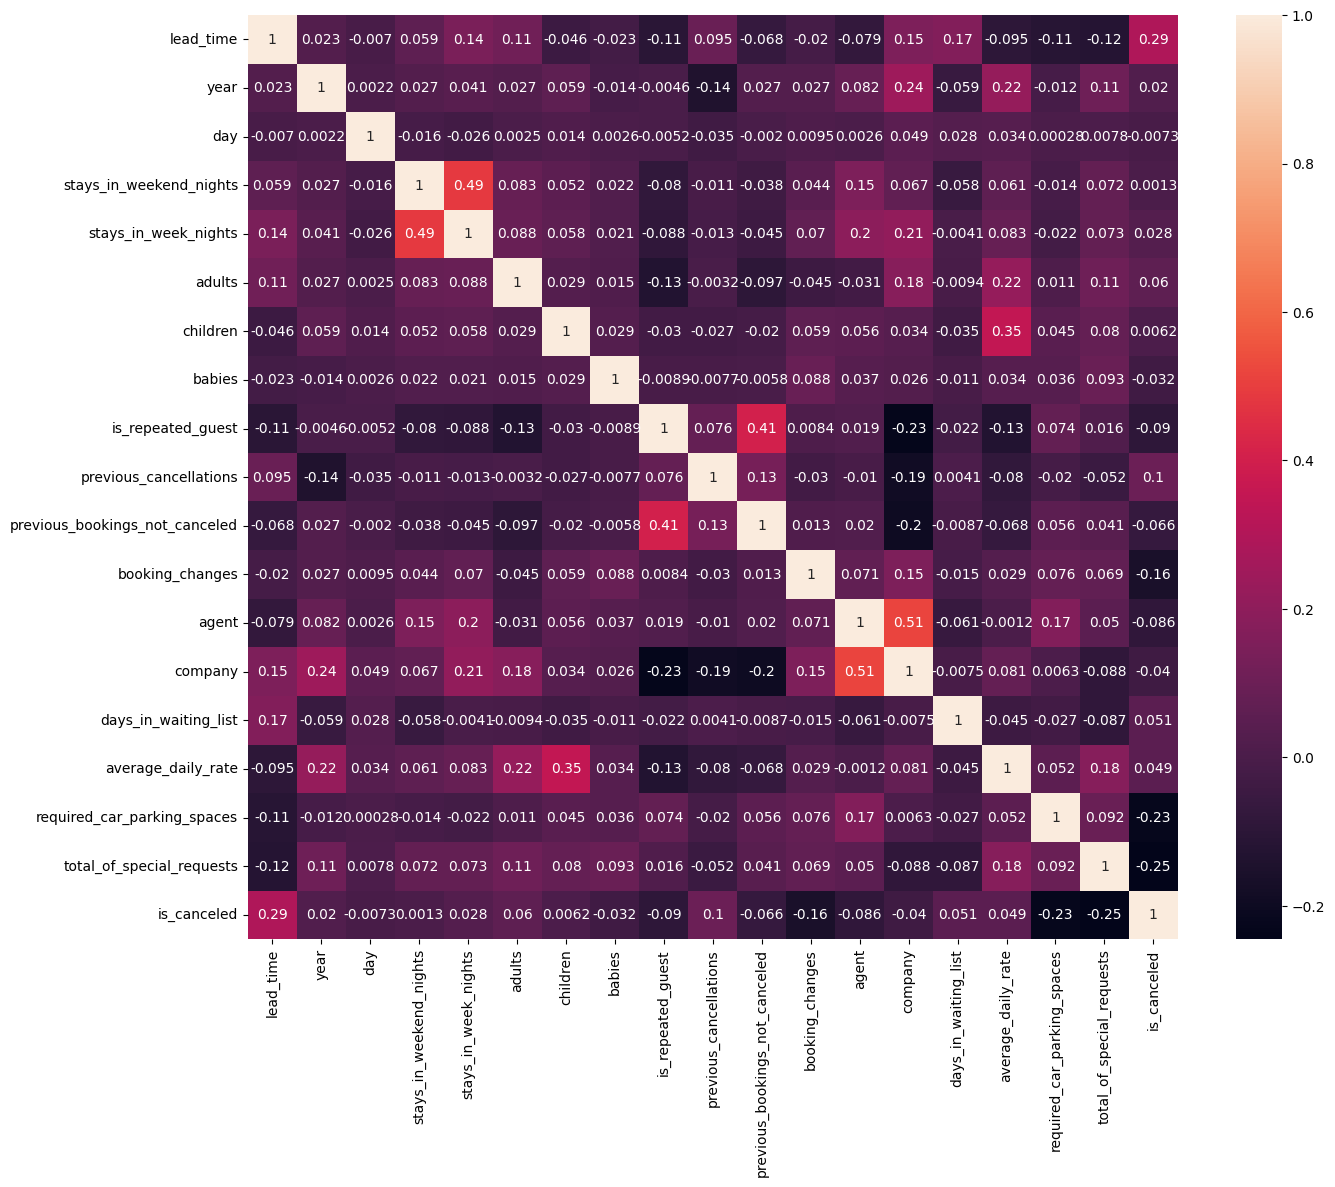

In [ ]:
matriz_correlacion =df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot = True) 
#sns.set(rc = {'figure.figsize':(20,12)})
#df.plot(figsize=(30,18))

plt.show()

# b) Visualización de los datos

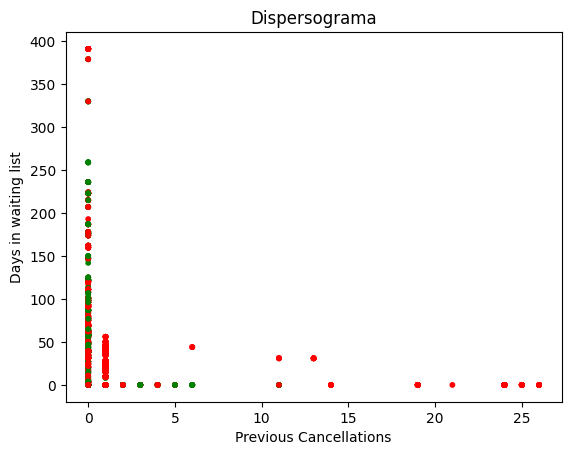

In [ ]:
#Scatter plot 
#Decidimos ver la relacion de las cancelaciones previas y los dias en lista de espera relacionandolo con el target.
col = df.is_canceled.map({0:'g', 1:'r'})
grf=df.plot.scatter(x="previous_cancellations", y="days_in_waiting_list", c=col, s=10).set(title="Dispersograma",xlabel='Previous Cancellations',ylabel='Days in waiting list') 

 Vemos que si hizo mas de 8 cancelaciones previas, es muy probable que cancele la reserva.
 
Tambien vemos que si estuvo mas de 280 dias en la lista de espera y a pesar que no tuvo ninguna cancelacion previa, es probable que cancele la reserva.

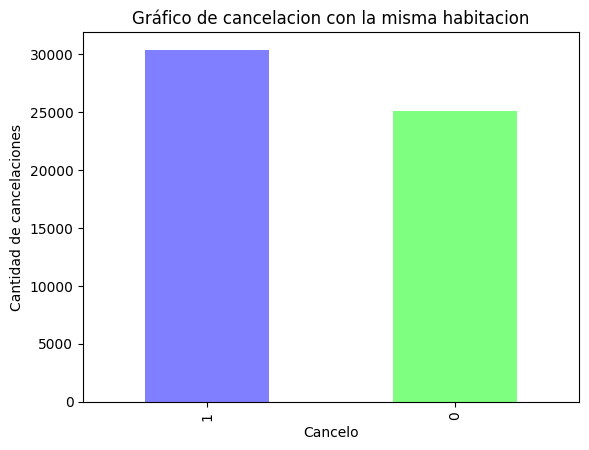

In [ ]:
#Consideramos que puede haber una relacion entre el target y que le asignen la misma habitacion que reservaron o el caso contrario.
room_assigned_equal_reserved = df[((df['reserved_room_type'] == df['assigned_room_type']) ) ]
room_assigned_different_reserved = df[((df['reserved_room_type'] != df['assigned_room_type']) )]
#plt.figure(figsize=(4, 2))
gr= room_assigned_equal_reserved['is_canceled'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cancelacion con la misma habitacion", xlabel="Cancelo",ylabel="Cantidad de cancelaciones")

En este grafico, vemos que a los que le asignaron el mismo tipo de habitacion que reservaron, tienden a cancelar mas. Esto tendria logica si lo pensamos de la manera en que al realizado la reserva, a los clientes les hubiera gustado que se le asigne una de mejor categoria.

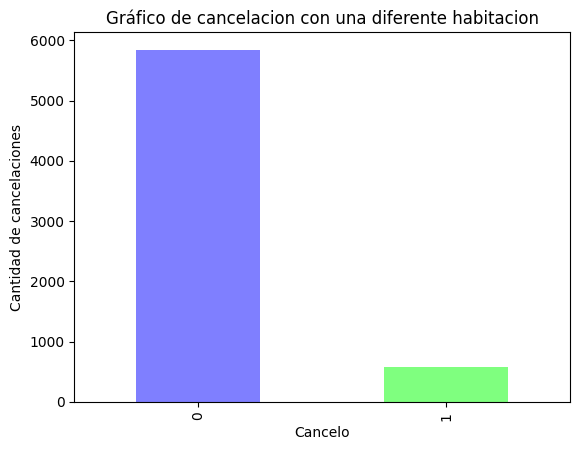

In [ ]:
gr= room_assigned_different_reserved['is_canceled'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cancelacion con una diferente habitacion", xlabel="Cancelo",ylabel="Cantidad de cancelaciones")

Por otro lado, vemos que a los que le asignaron distinto tipo de habitacion que reservaron, tienden a no cancelar . Asi mismo, aca consideramos que los que eservaron se les termino asignando una habitacion de mejor categoria.

Ahora, decidimos agrupar 3 columnas del dataset a una sola que indique el dia de llegada y castearlo a tipo datetime

In [ ]:
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8,'September':9, 'October':10,'November':11, 'December': 12 }
df.month = df.month.map(months)

In [ ]:
arrivaldates = df.copy() 
import datetime

date=arrivaldates.apply(lambda x: datetime.date(int(x['year']), x['month'], x['day']),axis=1)

date = pd.to_datetime(date)

df = df.drop(columns=['year', 'month', 'day'])

df.insert(0, 'arrival_date', date)


In [ ]:
df.head() #Imprimimos para asegurarnos que se hizo el cambio correctamente

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
0   2016-09-05    City Hotel         49                        1   
1   2015-10-31  Resort Hotel          4                        0   
2   2016-10-13    City Hotel         25                        0   
3   2016-12-12    City Hotel         26                        2   
4   2017-03-19    City Hotel        104                        2   

   stays_in_week_nights  adults  children  babies meal country  ...  agent  \
0                     2       1       0.0       0   BB     USA  ...    9.0   
1                     1       2       0.0       0   BB     PRT  ...    NaN   
2                     1       2       2.0       0   BB     CHE  ...    9.0   
3                     5       2       0.0       0   BB     PRT  ...  154.0   
4                     5       2       0.0       0   BB     FRA  ...   20.0   

  company  days_in_waiting_list    customer_type  average_daily_rate  \
0     NaN                     0        Transient               115.5   
1     NaN                     0        Transient                42.0   
2     NaN                     0        Transient               229.0   
3     NaN                     0        Transient                75.0   
4     NaN                     0  Transient-Party                75.0   

  required_car_parking_spaces total_of_special_requests  \
0                           0                         1   
1                           1                         0   
2                           0                         2   
3                           0                         0   
4                           0                         1   

   reservation_status_date                                    id  is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689            1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1            0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c            0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff            1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592            0  

[5 rows x 29 columns]

# c) Datos Faltantes

## ● Analisis de datos faltantes por columna

In [ ]:
#Vemos el porcentaje de datos faltantes en porcentaje
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

arrival_date                       0.000000
hotel                              0.000000
lead_time                          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             12.741282
company                           94.908656
days_in_waiting_list               0.000000
customer_type                   

## ● Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset

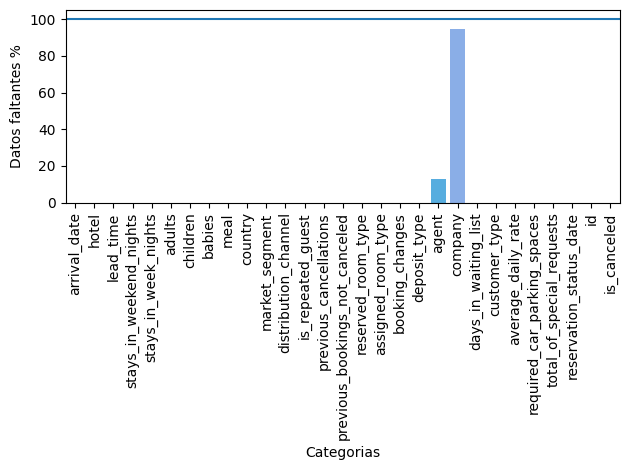

In [ ]:
porcentaje_datos_faltantes = (df.isna().sum()/filas_totales*100)
graph = sns.barplot(x=porcentaje_datos_faltantes.index, y=porcentaje_datos_faltantes.values)
graph.axhline(100)
plt.ylabel("Datos faltantes %")
plt.xlabel("Categorias")
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
#Decidimos eliminar la columna de company dado que el porcentaje de datos nulos es bastante alto, y seria casi imposible poder modificarlo.
#Tambien decidimos eliminar la columna 'reservation_status_date' dado que en la catedra se decidio eliminar la categoria 'reservation_status', y ya no tendria que afectar en nada a nuestro analisis.
df= df.drop(columns=['company', 'reservation_status_date'])
print(df.columns.to_list()) #para asegurarnos que fueron eliminados


['arrival_date', 'hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'average_daily_rate', 'required_car_parking_spaces', 'total_of_special_requests', 'id', 'is_canceled']


## ● Comparar las distribuciones de los atributos modificados

# Nueva sección

In [ ]:
#Sabemos que hay datos nulos en children, por lo que queremos ver cuantos son.
df['children'].isna().sum()

0

In [ ]:
df[np.isnan(df['children']) == True]

Empty DataFrame
Columns: [arrival_date, hotel, lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, average_daily_rate, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 27 columns]

Vemos que los 4 casos viajan a un city_hotel en agosto del 2015 con 2 adultos, 0 bebes y desde Portugal.

In [ ]:
predicted_children = df[(df['hotel'] == 'City Hotel') & (df['adults']== 2) & (df['babies'] == 0) & (df['country'] == 'PRT') & df['arrival_date'].between('2015-08-01', '2015-08-31')]
predicted_children['children'].mode() #vemos que con esas caracteristicas, la moda me da 0, decido modificarlo por 0s

0    0.0
Name: children, dtype: float64

In [ ]:
df['children'] = df['children'].fillna(0.0)
df['children'] = df['children'].astype(int)

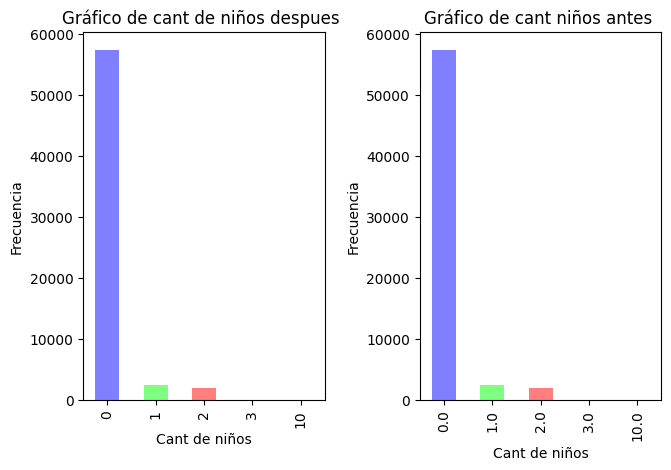

In [ ]:
fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df_original['children'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cant niños antes ", xlabel="Cant de niños",ylabel="Frecuencia")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df['children'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cant de niños despues ", xlabel="Cant de niños",ylabel="Frecuencia")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

Vemos que la distribucion no fue afectada, esto tambien se ebe dado que la cantidad de nulos era muy baja con respecto al total de datos.

In [ ]:
#Sabemos que hay datos nulos en children, por lo que queremos ver cuantos son.
df['agent'].isna().sum()

7888

In [ ]:
df['agent'].mode() #decidimos calcular la moda (el valor con mayor freuencia)

0    9.0
Name: agent, dtype: float64

In [ ]:
df['agent'] = df['agent'].fillna(9.0) #Cambiamos los datos faltantes por la moda, dado que es el que mas se repite y poder afectar menos nuestra distribucion

In [ ]:
df['agent'].isna().sum() #Verificamos que el cambio se hizo correctamente

0

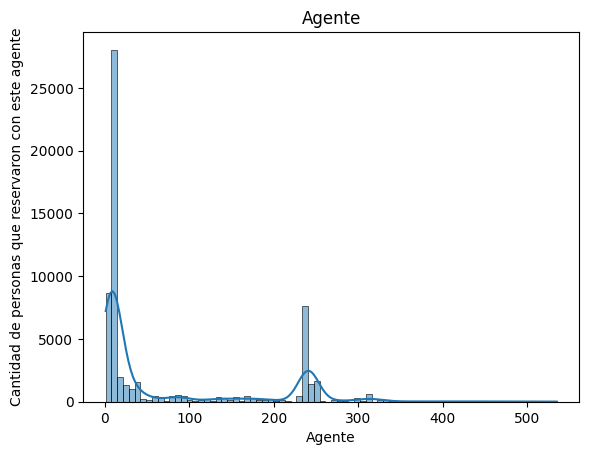

In [ ]:

sns_hist=sns.histplot(data=df['agent'], kde=True, alpha = 0.5).set(title="Agente",xlabel="Agente",ylabel="Cantidad de personas que reservaron con este agente")

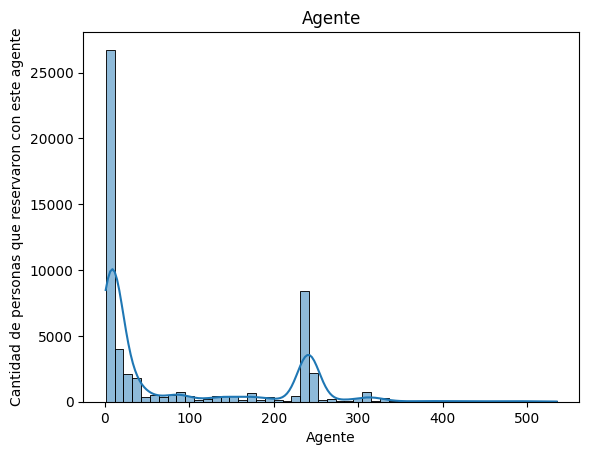

In [ ]:
sns_hist=sns.histplot(data=df_original['agent'], kde=True, alpha = 0.5).set(title="Agente",xlabel="Agente",ylabel="Cantidad de personas que reservaron con este agente")


In [ ]:
df_original['country'].mode() #Tiene sentido porque son hoteles de portugal

0    PRT
Name: country, dtype: object

In [ ]:
df['country'] = df['country'].fillna('PRT')

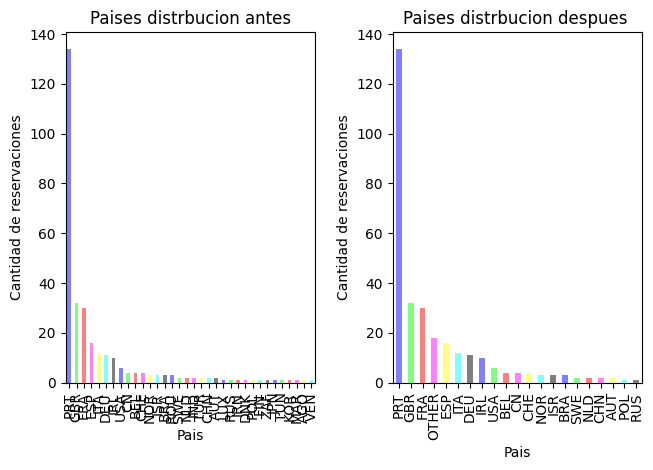

In [ ]:

fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['country'].head(300).value_counts().plot.bar(alpha=0.5,color=colores ,title="Paises distrbucion despues ", xlabel="Pais",ylabel="Cantidad de reservaciones")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots


gr=df_original['country'].head(300).value_counts().plot.bar(alpha=0.5,color=colores ,title="Paises distrbucion antes", xlabel="Pais",ylabel="Cantidad de reservaciones")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

Vemos que la distribucion se conserva

# d)  Valores atípicos

## ● Detectar valores atipicos de forma univariada y multivariada con graficos

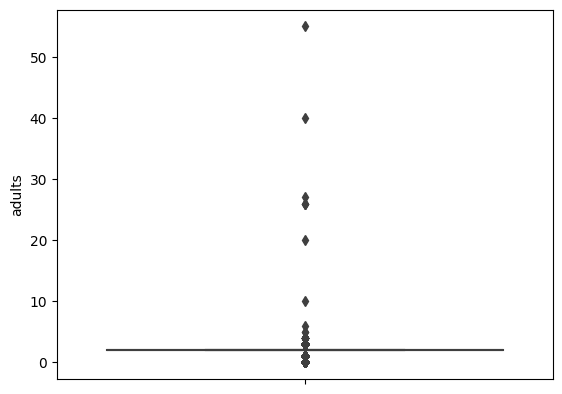

In [ ]:
sns.boxplot(y=df.adults)
plt.show()

In [ ]:
#z-score Peso con librería stats
zadultos = df.loc[:,['adults', 'is_canceled']]
zadultos['z_adults']=stats.zscore(df.adults)
zadultos[(zadultos['z_adults']>=3) | (zadultos['z_adults']<=-3)]

adults  is_canceled  z_adults
96          0            1 -3.162258
212         0            1 -3.162258
270         0            1 -3.162258
326         0            0 -3.162258
464         0            0 -3.162258
...       ...          ...       ...
60837       0            0 -3.162258
60873       4            0  3.628197
60994       0            0 -3.162258
61003       0            0 -3.162258
61298       0            0 -3.162258

[238 rows x 3 columns]

Segun z-score 4 es outlier pero es un valor normal de una reserva, tomamos outliers reservas de mas de 40 personas

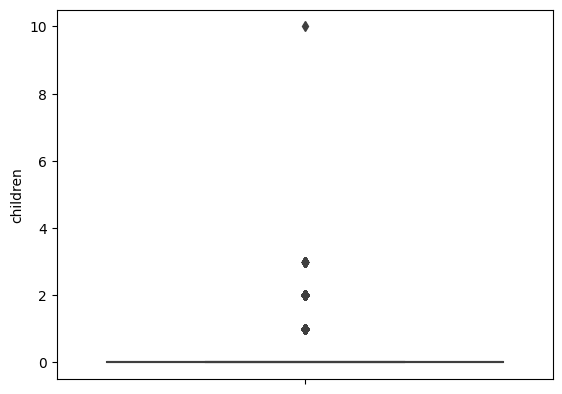

In [ ]:
sns.boxplot(y=df.children)
plt.show()

In [ ]:
df[df['children'] > 8]

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
49181   2015-07-12  Resort Hotel         55                        4   

       stays_in_week_nights  adults  children  babies meal country  ...  \
49181                    10       2        10       0   BB     PRT  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
49181               2   No Deposit    8.0                     0   

       customer_type average_daily_rate required_car_parking_spaces  \
49181       Contract             133.16                           0   

       total_of_special_requests                                    id  \
49181                          1  44093355-c1c8-41eb-bcb4-40dc494fa1a9   

       is_canceled  
49181            1  

[1 rows x 27 columns]

Tomamos como outliers las reservas con mas de 8 niños 

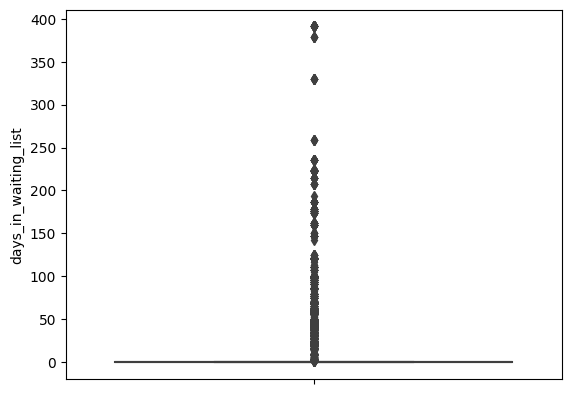

In [ ]:
sns.boxplot(y=df.days_in_waiting_list)
plt.show()

In [ ]:
#z-score days in waiting list
zdiwl = df.loc[:,['days_in_waiting_list', 'is_canceled']]
zdiwl['z_diwl']=stats.zscore(df.days_in_waiting_list)
zdiwl_outliers = zdiwl[(zdiwl['z_diwl']>=3) | (zdiwl['z_diwl']<=-3)]
zdiwl_outliers

days_in_waiting_list  is_canceled     z_diwl
11                      162            1   8.558800
52                       91            1   4.745600
76                       93            1   4.853014
155                      60            1   3.080682
206                      77            0   3.993702
...                     ...          ...        ...
61751                    68            1   3.510338
61757                    62            1   3.188096
61797                   259            0  13.768384
61805                   178            1   9.418113
61812                    65            0   3.349217

[965 rows x 3 columns]

In [ ]:
zprevious_cancellations = df.loc[:,['previous_cancellations', 'is_canceled']]
zprevious_cancellations['z_previous_cancellations']=stats.zscore(df.previous_cancellations)
zprevious_cancellations_outlier = zprevious_cancellations[(zprevious_cancellations['z_previous_cancellations']>=3) | (zprevious_cancellations['z_previous_cancellations']<=-3)]
zprevious_cancellations_outlier.sort_values('previous_cancellations')

previous_cancellations  is_canceled  z_previous_cancellations
60793                       4            1                  3.909651
20263                       4            0                  3.909651
5620                        4            0                  3.909651
20816                       4            0                  3.909651
30550                       4            0                  3.909651
...                       ...          ...                       ...
15598                      26            1                 26.048092
23206                      26            1                 26.048092
6029                       26            1                 26.048092
53765                      26            1                 26.048092
152                        26            1                 26.048092

[162 rows x 3 columns]

In [ ]:
adults_atipico = df[df['adults']==0];
adults_atipico

arrival_date       hotel  lead_time  stays_in_weekend_nights  \
96      2016-05-21  City Hotel         23                        2   
212     2017-07-07  City Hotel        315                        0   
270     2017-02-21  City Hotel          4                        0   
326     2016-11-29  City Hotel         53                        0   
464     2015-10-16  City Hotel         64                        2   
...            ...         ...        ...                      ...   
59982   2016-02-08  City Hotel         44                        1   
60837   2017-05-09  City Hotel         33                        0   
60994   2016-08-19  City Hotel         11                        0   
61003   2016-11-09  City Hotel         57                        0   
61298   2016-01-14  City Hotel         40                        0   

       stays_in_week_nights  adults  children  babies meal country  ...  \
96                        4       0         2       0   BB   OTHER  ...   
212                       1       0         2       0   BB     USA  ...   
270                       3       0         0       0   SC     PRT  ...   
326                       4       0         2       0   BB   OTHER  ...   
464                       3       0         0       0   SC     FRA  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
59982                     3       0         2       0   BB     ITA  ...   
60837                     1       0         0       0   SC     PRT  ...   
60994                     1       0         2       0   BB     BEL  ...   
61003                     2       0         0       0   SC   OTHER  ...   
61298                     3       0         2       0   BB     ESP  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
96                  0   No Deposit    9.0                     0   
212                 0   No Deposit    9.0                     0   
270                 0   No Deposit    9.0                     0   
326                 0   No Deposit    9.0                     0   
464                 2   No Deposit   50.0                     0   
...               ...          ...    ...                   ...   
59982               0   No Deposit    9.0                     0   
60837               3   No Deposit   87.0                     0   
60994               0   No Deposit    9.0                     0   
61003               0   No Deposit   14.0                     0   
61298               0   No Deposit    9.0                     0   

         customer_type average_daily_rate required_car_parking_spaces  \
96           Transient             128.49                           0   
212          Transient              91.85                           0   
270    Transient-Party               0.00                           0   
326          Transient              77.86                           0   
464    Transient-Party               0.00                           0   
...                ...                ...                         ...   
59982  Transient-Party              66.50                           0   
60837        Transient             200.00                           0   
60994        Transient             127.60                           0   
61003        Transient             165.38                           0   
61298        Transient               6.00                           0   

       total_of_special_requests                                    id  \
96                             0  dcaf076d-bd38-47dd-8d9d-16be09cd5b08   
212                            2  55c9b5f9-b5d0-49a2-9348-c6476a0bd772   
270                            0  6a48e05e-c36a-41d0-b7e0-5f8b92dab109   
326                            2  74fe3153-e2ae-4650-a375-05fc52881a56   
464                            0  cfe370c2-298a-4de8-82fd-f8d418febd7f   
...                          ...                                   ...   
59982                          1  8b700cc2-903e-4400-9c68-aba04d

In [ ]:
children_with_babies_atipico = adults_atipico[adults_atipico['babies']!=0]
children_with_babies_atipico

arrival_date       hotel  lead_time  stays_in_weekend_nights  \
41018   2015-12-09  City Hotel         22                        1   

       stays_in_week_nights  adults  children  babies meal country  ...  \
41018                     4       0         2       1   BB     PRT  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
41018               1   No Deposit   14.0                     0   

       customer_type average_daily_rate required_car_parking_spaces  \
41018      Transient              80.75                           0   

       total_of_special_requests                                    id  \
41018                          1  66690d14-4436-42a1-9297-bc34d36e48eb   

       is_canceled  
41018            1  

[1 rows x 27 columns]

Tomamos como outlier a la reserva de niño con bebe sin adulto

In [ ]:
children_atipico = adults_atipico[adults_atipico['babies']==0]
children_atipico

arrival_date       hotel  lead_time  stays_in_weekend_nights  \
96      2016-05-21  City Hotel         23                        2   
212     2017-07-07  City Hotel        315                        0   
270     2017-02-21  City Hotel          4                        0   
326     2016-11-29  City Hotel         53                        0   
464     2015-10-16  City Hotel         64                        2   
...            ...         ...        ...                      ...   
59982   2016-02-08  City Hotel         44                        1   
60837   2017-05-09  City Hotel         33                        0   
60994   2016-08-19  City Hotel         11                        0   
61003   2016-11-09  City Hotel         57                        0   
61298   2016-01-14  City Hotel         40                        0   

       stays_in_week_nights  adults  children  babies meal country  ...  \
96                        4       0         2       0   BB   OTHER  ...   
212                       1       0         2       0   BB     USA  ...   
270                       3       0         0       0   SC     PRT  ...   
326                       4       0         2       0   BB   OTHER  ...   
464                       3       0         0       0   SC     FRA  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
59982                     3       0         2       0   BB     ITA  ...   
60837                     1       0         0       0   SC     PRT  ...   
60994                     1       0         2       0   BB     BEL  ...   
61003                     2       0         0       0   SC   OTHER  ...   
61298                     3       0         2       0   BB     ESP  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
96                  0   No Deposit    9.0                     0   
212                 0   No Deposit    9.0                     0   
270                 0   No Deposit    9.0                     0   
326                 0   No Deposit    9.0                     0   
464                 2   No Deposit   50.0                     0   
...               ...          ...    ...                   ...   
59982               0   No Deposit    9.0                     0   
60837               3   No Deposit   87.0                     0   
60994               0   No Deposit    9.0                     0   
61003               0   No Deposit   14.0                     0   
61298               0   No Deposit    9.0                     0   

         customer_type average_daily_rate required_car_parking_spaces  \
96           Transient             128.49                           0   
212          Transient              91.85                           0   
270    Transient-Party               0.00                           0   
326          Transient              77.86                           0   
464    Transient-Party               0.00                           0   
...                ...                ...                         ...   
59982  Transient-Party              66.50                           0   
60837        Transient             200.00                           0   
60994        Transient             127.60                           0   
61003        Transient             165.38                           0   
61298        Transient               6.00                           0   

       total_of_special_requests                                    id  \
96                             0  dcaf076d-bd38-47dd-8d9d-16be09cd5b08   
212                            2  55c9b5f9-b5d0-49a2-9348-c6476a0bd772   
270                            0  6a48e05e-c36a-41d0-b7e0-5f8b92dab109   
326                            2  74fe3153-e2ae-4650-a375-05fc52881a56   
464                            0  cfe370c2-298a-4de8-82fd-f8d418febd7f   
...                          ...                                   ...   
59982                          1  8b700cc2-903e-4400-9c68-aba04d

In [ ]:
children_babies_adults_on_zero = adults_atipico[(adults_atipico['children']==0) & (adults_atipico['babies']==0)] 
children_babies_adults_on_zero

arrival_date       hotel  lead_time  stays_in_weekend_nights  \
270     2017-02-21  City Hotel          4                        0   
464     2015-10-16  City Hotel         64                        2   
2249    2017-06-19  City Hotel         26                        1   
2408    2017-03-17  City Hotel          0                        0   
2474    2016-07-06  City Hotel        244                        2   
...            ...         ...        ...                      ...   
57225   2016-07-06  City Hotel        244                        2   
57772   2016-07-19  City Hotel          0                        0   
59389   2015-08-11  City Hotel          0                        2   
60837   2017-05-09  City Hotel         33                        0   
61003   2016-11-09  City Hotel         57                        0   

       stays_in_week_nights  adults  children  babies meal country  ...  \
270                       3       0         0       0   SC     PRT  ...   
464                       3       0         0       0   SC     FRA  ...   
2249                      4       0         0       0   SC     GBR  ...   
2408                      0       0         0       0   SC     PRT  ...   
2474                      4       0         0       0   SC     PRT  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
57225                     4       0         0       0   SC     PRT  ...   
57772                     1       0         0       0   BB     SWE  ...   
59389                    10       0         0       0   SC     ITA  ...   
60837                     1       0         0       0   SC     PRT  ...   
61003                     2       0         0       0   SC   OTHER  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
270                 0   No Deposit    9.0                     0   
464                 2   No Deposit   50.0                     0   
2249                2   No Deposit    9.0                     0   
2408                0   No Deposit    9.0                     0   
2474                0   No Deposit   19.0                     0   
...               ...          ...    ...                   ...   
57225               0   No Deposit   19.0                     0   
57772               2   No Deposit   14.0                     0   
59389              11   No Deposit    9.0                     0   
60837               3   No Deposit   87.0                     0   
61003               0   No Deposit   14.0                     0   

         customer_type average_daily_rate required_car_parking_spaces  \
270    Transient-Party               0.00                           0   
464    Transient-Party               0.00                           0   
2249         Transient              90.00                           0   
2408         Transient               0.00                           0   
2474         Transient               0.00                           0   
...                ...                ...                         ...   
57225        Transient               0.00                           0   
57772        Transient               0.00                           0   
59389            Group               0.00                           0   
60837        Transient             200.00                           0   
61003        Transient             165.38                           0   

       total_of_special_requests                                    id  \
270                            0  6a48e05e-c36a-41d0-b7e0-5f8b92dab109   
464                            0  cfe370c2-298a-4de8-82fd-f8d418febd7f   
2249                           1  ebf0cb8f-fb23-4742-ba20-99d6805fc046   
2408                           0  d9dc2c34-8489-4d83-b998-12d32ae90caa   
2474                           0  3c52496c-eb31-4333-9368-f82546757556   
...                          ...                                   ...   
57225                          0  4899b4cc-4a9b-4de8-8984-5b3bf9

In [ ]:
sin_dias = df[(df['stays_in_weekend_nights']==0) &(df['stays_in_week_nights'] ==0)]
sin_dias

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
393     2016-05-17    City Hotel          0                        0   
1131    2017-02-12  Resort Hotel          0                        0   
1454    2015-10-21  Resort Hotel          1                        0   
1551    2016-11-15    City Hotel         32                        0   
1731    2017-05-08  Resort Hotel          0                        0   
...            ...           ...        ...                      ...   
60941   2015-11-23    City Hotel          0                        0   
61008   2016-07-20    City Hotel         36                        0   
61180   2017-06-28    City Hotel          1                        0   
61514   2016-02-16  Resort Hotel          1                        0   
61771   2016-10-27  Resort Hotel         34                        0   

       stays_in_week_nights  adults  children  babies meal country  ...  \
393                       0       2         0       0   HB     PRT  ...   
1131                      0       1         0       0   BB     POL  ...   
1454                      0       1         0       0   BB     PRT  ...   
1551                      0       1         0       0   SC     PRT  ...   
1731                      0       2         0       0   BB     PRT  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
60941                     0       2         0       0   BB     PRT  ...   
61008                     0       2         2       0   BB     PRT  ...   
61180                     0       1         0       0   BB     NLD  ...   
61514                     0       2         0       0   BB     PRT  ...   
61771                     0       2         0       0   BB     PRT  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
393                 0   No Deposit    6.0                     0   
1131                0   No Deposit  240.0                     0   
1454                0   No Deposit    9.0                     0   
1551                0   No Deposit    7.0                     0   
1731                0   No Deposit    9.0                     0   
...               ...          ...    ...                   ...   
60941               0   No Deposit    8.0                     0   
61008               1   No Deposit    9.0                     0   
61180               0   No Deposit    9.0                     0   
61514               0   No Deposit    9.0                     0   
61771               0   No Deposit    6.0                     0   

       customer_type average_daily_rate required_car_parking_spaces  \
393        Transient                0.0                           0   
1131       Transient                0.0                           0   
1454       Transient                0.0                           0   
1551       Transient                0.0                           0   
1731       Transient                0.0                           0   
...              ...                ...                         ...   
60941      Transient                0.0                           0   
61008      Transient                0.0                           0   
61180      Transient                0.0                           0   
61514      Transient                0.0                           1   
61771      Transient                0.0                           0   

       total_of_special_requests                                    id  \
393                            0  02a4c88e-79b0-4afe-9f21-39dcbcb977ad   
1131                           0  833c0f31-dedd-4cc5-9baa-5ffbc0ac1011   
1454                           0  759a6c13-88d0-4522-bf3b-a815d7f581f4   
1551                           1  0d630779-e22a-400b-9c09-10586ffceab3   
1731                           0  d537e8ad-9ddd-453d-83b4-41f8a3a8487f   
...                          ...                                   ...   
60941                          0  f5c99bf4-1a25-484e-ae35-025fc9

In [ ]:
df[df['average_daily_rate']==0]

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
21      2016-12-14  Resort Hotel          9                        0   
61      2015-12-05    City Hotel         47                        2   
102     2015-10-21  Resort Hotel         28                        0   
130     2017-06-09  Resort Hotel         38                        1   
219     2017-01-10    City Hotel          6                        0   
...            ...           ...        ...                      ...   
61760   2017-04-25  Resort Hotel        109                        0   
61765   2015-11-13    City Hotel         21                        0   
61771   2016-10-27  Resort Hotel         34                        0   
61835   2015-08-01  Resort Hotel         71                        2   
61891   2017-03-14    City Hotel         11                        0   

       stays_in_week_nights  adults  children  babies meal country  ...  \
21                        2       2         0       0   BB     PRT  ...   
61                        1       1         0       0   BB     ESP  ...   
102                       2       2         0       0   BB     PRT  ...   
130                       2       2         0       0   SC     PRT  ...   
219                       1       3         0       0   BB     PRT  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
61760                     2       1         0       0   HB     AUT  ...   
61765                     2       2         0       0   BB     PRT  ...   
61771                     0       2         0       0   BB     PRT  ...   
61835                     6       2         0       0   BB     PRT  ...   
61891                     2       1         0       0   BB     PRT  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
21                  0   No Deposit    9.0                     0   
61                  1   No Deposit    1.0                     0   
102                 0   No Deposit  208.0                     0   
130                 0   No Deposit  240.0                     0   
219                 0   No Deposit    9.0                     0   
...               ...          ...    ...                   ...   
61760               0   No Deposit  502.0                     0   
61765               0   No Deposit    9.0                     0   
61771               0   No Deposit    6.0                     0   
61835               1   No Deposit  196.0                     0   
61891               0   No Deposit    9.0                     0   

         customer_type average_daily_rate required_car_parking_spaces  \
21           Transient                0.0                           0   
61     Transient-Party                0.0                           0   
102    Transient-Party                0.0                           0   
130          Transient                0.0                           0   
219          Transient                0.0                           0   
...                ...                ...                         ...   
61760  Transient-Party                0.0                           0   
61765        Transient                0.0                           0   
61771        Transient                0.0                           0   
61835        Transient                0.0                           0   
61891        Transient                0.0                           0   

       total_of_special_requests                                    id  \
21                             0  b26bb222-3f15-4f54-84fd-fc1762dd47ce   
61                             0  03977185-cd72-4906-8a1f-43c3b4858cae   
102                            0  24d77fe6-3663-44f8-adbd-7e8c5597db88   
130                            1  58e72f07-fdda-4ba1-bc26-eb537b1c234f   
219                            1  0f2d9788-48f8-4635-b9d2-b703937e3029   
...                          ...                                   ...   
61760                          0  507381

Lo interpretamos como valor atipico ya que en caso de que haya sido un regalo el hotel registraria el valor de la estadia.

In [ ]:
def mahal_dists(X):
    sample_X = X.sample(frac=0.1)
    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T
    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)
    Wx = np.matmul(W, X_diff)
    return np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])



In [ ]:
df_corr = df[['previous_cancellations','days_in_waiting_list']].copy()
mahal = mahal_dists(df_corr)
df_corr['mahalanobis'] = mahal
df_corr.head()

previous_cancellations  days_in_waiting_list  mahalanobis
0                       0                     0     0.031592
1                       0                     0     0.031592
2                       0                     0     0.031592
3                       0                     0     0.031592
4                       0                     0     0.031592

<Axes: ylabel='mahalanobis'>

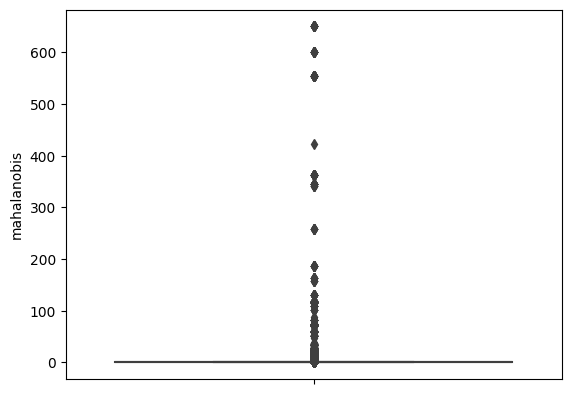

In [ ]:
sns.boxplot(y=df_corr.mahalanobis)

## ● Explicar caracteristicas de los datos atipicos detectados

Datos que datos claramente atipicos son reservas:


*   Solo niños con bebes
*   Solo bebes
*   Sin ningun participante
*   Sin dias tanto en fines de semana como dias de semana
*   De grupos grandes
*   De grupos con mas de 8 niños
*   Average daily rate en cero
*   Average daily rate es negativo
*   Days in waiting list de mas de un año





## ● Decision del tratamiento a aplicar 

Podemos eliminar las filas que no tengan adultos ninios o bebes tanto como las filas que solo tengan bebes en las reservas ya que son un porcentaje inferior a x del dataset

# Conclusion

Si una persona es un outlier en previous_cancellations y en days_in_waiting_list probablemente cancele



In [ ]:
df.agg(['min','max']) #vemos que adr da negativo no se quedo en fin de semana ni en dia de semana pero NO se cancelo

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
min   2015-07-01    City Hotel          0                        0   
max   2017-08-31  Resort Hotel        629                       16   

     stays_in_week_nights  adults  children  babies meal country  ...  \
min                     0       0         0       0   BB     AUT  ...   
max                    40      55        10       9   SC     USA  ...   

    booking_changes deposit_type  agent  days_in_waiting_list  \
min               0   No Deposit    1.0                     0   
max              17   Refundable  535.0                   391   

       customer_type average_daily_rate required_car_parking_spaces  \
min         Contract              -6.38                           0   
max  Transient-Party             510.00                           8   

     total_of_special_requests                                    id  \
min                          0  0000aab4-4a77-4d46-96ce-cf4d287f86fd   
max                          5  ffff7b1f-6842-4773-be10-1b9009045ad8   

     is_canceled  
min            0  
max            1  

[2 rows x 27 columns]

In [ ]:
#encontramos una fila con dato outlier, adr = -6.38
df_adr_menor_a_cero = df.loc[df['average_daily_rate'] < 0]
df_adr_menor_a_cero

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
21124   2017-03-05  Resort Hotel        195                        4   

       stays_in_week_nights  adults  children  babies meal country  ...  \
21124                     6       2         0       0   BB     GBR  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
21124               2   No Deposit  273.0                     0   

         customer_type average_daily_rate required_car_parking_spaces  \
21124  Transient-Party              -6.38                           0   

       total_of_special_requests                                    id  \
21124                          0  869f627f-35fb-42b0-8376-12869739d76e   

       is_canceled  
21124            0  

[1 rows x 27 columns]

In [ ]:
#eliminamos el outlier porque una fila respecto a la gran cantidad de datos que tenemos no es relevante
df.drop(df[df['average_daily_rate']<0].index, axis='index',inplace=True)

In [ ]:
cantidad_de_adr_en_0 = df[df['average_daily_rate']==0].shape[0]
porcentaje_de_adr_en_0 = cantidad_de_adr_en_0 *100/ df_original.shape[0]
porcentaje_de_adr_en_0 

1.4278099914396007

In [ ]:
df.drop(df[df['average_daily_rate']==0].index, axis='index',inplace=True)

In [ ]:
#bebes sin adultos es una sola fila
df[(df['babies']!=0) & (df['adults']==0)]

arrival_date       hotel  lead_time  stays_in_weekend_nights  \
41018   2015-12-09  City Hotel         22                        1   

       stays_in_week_nights  adults  children  babies meal country  ...  \
41018                     4       0         2       1   BB     PRT  ...   

      booking_changes deposit_type  agent  days_in_waiting_list  \
41018               1   No Deposit   14.0                     0   

       customer_type average_daily_rate required_car_parking_spaces  \
41018      Transient              80.75                           0   

       total_of_special_requests                                    id  \
41018                          1  66690d14-4436-42a1-9297-bc34d36e48eb   

       is_canceled  
41018            1  

[1 rows x 27 columns]

In [ ]:
df.drop(df[(df['babies']!=0) & (df['adults']==0)].index, axis='index',inplace=True)

In [ ]:
#ningun participante
sin_ningun_participante = df[(df['babies']==0) & (df['adults']==0) & (df['children']==0)].shape[0]
porcentaje_sin_ningun_participante = sin_ningun_participante *100 / df_original.shape[0]
porcentaje_sin_ningun_participante

0.020997205756464715

In [ ]:
df.drop(df[(df['babies']==0) & (df['adults']==0) & (df['children']==0)].index, axis='index',inplace=True)

In [ ]:
#% sin dias
sin_dias.shape[0] * 100 / (df_original.shape[0])

0.4797053930515401

In [ ]:
df.drop(df[(df['stays_in_weekend_nights']==0) &(df['stays_in_week_nights'] ==0)].index, axis='index',inplace=True)

In [ ]:
outlier_adultos = df_original[(df_original['adults']>= 10)]
outlier_adultos

hotel  lead_time  arrival_date_year arrival_date_month  \
4064   Resort Hotel        304               2015          September   
11830  Resort Hotel        334               2015            October   
19146  Resort Hotel        354               2015          September   
35477  Resort Hotel        334               2015            October   
38305  Resort Hotel        340               2015          September   
55112  Resort Hotel        349               2015          September   
59059  Resort Hotel        333               2015          September   
59165  Resort Hotel        338               2015            October   

       arrival_date_week_number  arrival_date_day_of_month  \
4064                         36                          3   
11830                        42                         12   
19146                        39                         26   
35477                        42                         12   
38305                        37                         12   
55112                        39                         21   
59059                        36                          5   
59165                        41                          4   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
4064                         0                     3      40       0.0  ...   
11830                        2                     5      20       0.0  ...   
19146                        2                     5      26       0.0  ...   
35477                        2                     5      10       0.0  ...   
38305                        2                     5      26       0.0  ...   
55112                        1                     3      27       0.0  ...   
59059                        2                     5      26       0.0  ...   
59165                        2                     0      55       0.0  ...   

       agent company days_in_waiting_list customer_type  adr  \
4064     NaN     NaN                    0         Group  0.0   
11830    NaN     NaN                    0         Group  0.0   
19146   96.0     NaN                    0         Group  0.0   
35477    NaN     NaN                    0         Group  0.0   
38305   96.0     NaN                    0         Group  0.0   
55112    NaN     NaN                    0         Group  0.0   
59059   96.0     NaN                    0         Group  0.0   
59165    NaN     NaN                    0         Group  0.0   

       required_car_parking_spaces  total_of_special_requests  \
4064                             0                          0   
11830                            0                          0   
19146                            0                          0   
35477                            0                          0   
38305                            0                          0   
55112                            0                          0   
59059                            0                          0   
59165                            0                          0   

       reservation_status_date                                    id  \
4064                2015-01-02  ebb06f2f-1c79-490c-ae9f-8f7ba838d328   
11830               2015-01-02  b169d836-a93c-43a3-8bb4-9ec2afa66483   
19146               2015-01-02  edcaa4e3-8b46-4812-9d09-672cd8b73589   
35477               2015-01-02  a2928fc5-26a1-4e9c-9be9-1d89f03dccf5   
38305               2015-01-02  f386dc39-94e7-4b56-9609-d12d80d9a6a8   
55112               2015-01-02  6ed0d330-fea1-4b4e-b9e8-cbdcdc514d7c   
59059               2015-01-02  62e325e1-4d46-4794-8d32-100a756074db   
59165               2015-01-02  9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2   

      is_canceled  
4064            1  
11830           1  
19146           1  
35477           1  
38305           1  
55112           1  
59059           1  
59165           1  

[8 rows x 32 columns]

In [ ]:
#pd.crosstab(df['is_canceled'],df['distribution_channel'])
#pd.crosstab(df['is_canceled'],df['meal'])
pd.crosstab(df['is_canceled'],df['deposit_type'])

deposit_type  No Deposit  Non Refund  Refundable
is_canceled                                     
0                  30143          37          50
1                  20639       10113          28

In [ ]:
pd.crosstab(df['is_canceled'],df['deposit_type'])

deposit_type  No Deposit  Non Refund  Refundable
is_canceled                                     
0                  30143          37          50
1                  20639       10113          28

In [ ]:
pd.crosstab(df_original['is_canceled'],df_original['arrival_date_month'])


arrival_date_month  April  August  December  February  January  July  June  \
is_canceled                                                                  
0                    2751    3564      1806      2228     1735  3185  2603   
1                    3127    3612      1687      1897     1266  3339  3169   

arrival_date_month  March   May  November  October  September  
is_canceled                                                    
0                    2680  2895      1921     2894       2710  
1                    2219  3264      1483     2969       2909

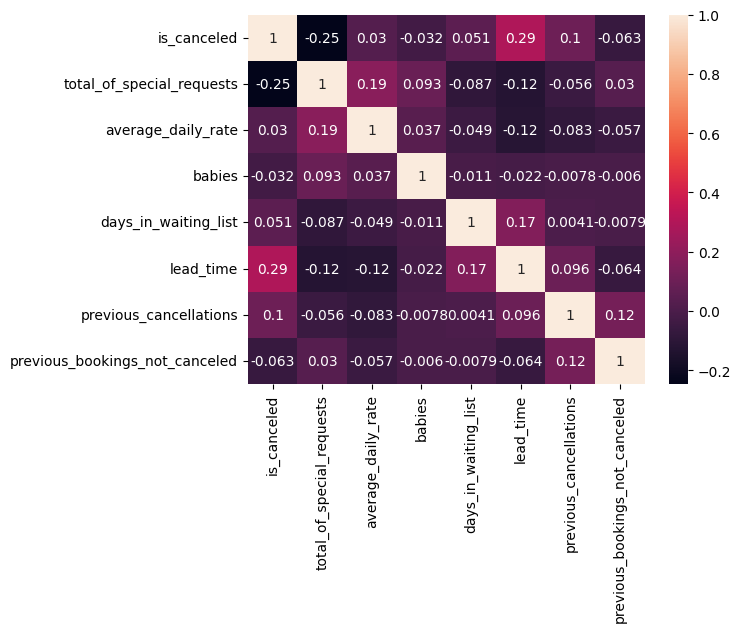

In [ ]:
df_booking_changes = df[['is_canceled', 'total_of_special_requests','average_daily_rate','babies', 'days_in_waiting_list','lead_time', 'previous_cancellations', 'previous_bookings_not_canceled']] #d'f filtrado

matriz_correlacion = df_booking_changes.corr()
sns.heatmap(matriz_correlacion, annot = True) 
plt.show()  #vemos que lead_time tiene mayor relacion con la cancelacion

In [ ]:
df_booking_changes

is_canceled  total_of_special_requests  average_daily_rate  babies  \
0                1                          1              115.50       0   
1                0                          0               42.00       0   
2                0                          2              229.00       0   
3                1                          0               75.00       0   
4                0                          1               75.00       0   
...            ...                        ...                 ...     ...   
61908            1                          1               48.00       0   
61909            0                          0              149.00       0   
61910            0                          0               95.00       0   
61911            1                          0               36.05       0   
61912            1                          0              143.29       0   

       days_in_waiting_list  lead_time  previous_cancellations  \
0                         0         49                       0   
1                         0          4                       0   
2                         0         25                       0   
3                         0         26                       0   
4                         0        104                       0   
...                     ...        ...                     ...   
61908                     0         24                       0   
61909                     0          0                       0   
61910                     0         10                       0   
61911                     0        143                       0   
61912                     0         57                       0   

       previous_bookings_not_canceled  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...                               ...  
61908                               0  
61909                               0  
61910                               0  
61911                               0  
61912                               0  

[61010 rows x 8 columns]

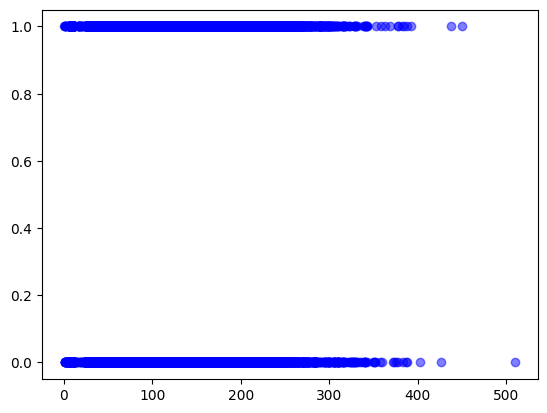

In [ ]:
plt.scatter(df['average_daily_rate'],df['is_canceled'],color='blue',alpha=0.5)
#posibles 4 puntos outliers


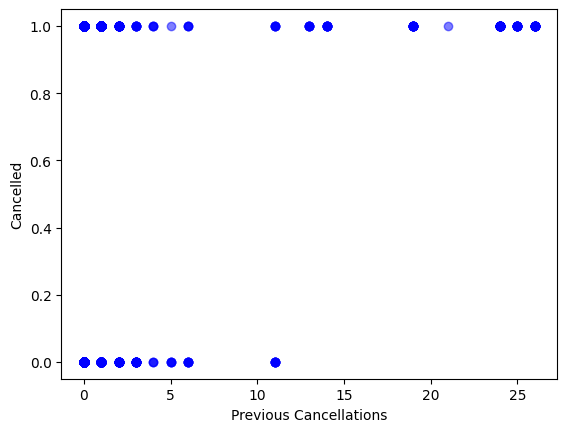

In [ ]:
plt.scatter(df['previous_cancellations'],df['is_canceled'],color='blue',alpha=0.5)
#superando las 10 cancelaciones previas es MUY probable que cancelen
plt.ylabel('Cancelled') 
plt.xlabel('Previous Cancellations') 
plt.show()


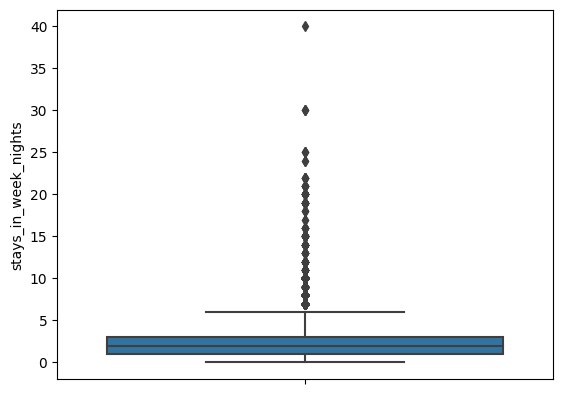

In [ ]:
sns.boxplot(y=df.stays_in_week_nights)
plt.show()

In [ ]:
df_atipico = df[df['stays_in_week_nights'] >= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_week_nights'])


stays_in_week_nights    5    6    7    8   9    10  11  12  13  14  ...  17  \
is_canceled                                                         ...       
0                     2904  386  295  185  54  306   6   9   6   2  ...   0   
1                     2731  405  229  156  67  200  20  19   5  21  ...   2   

stays_in_week_nights  18  19  20  21  22  24  25  30  40  
is_canceled                                               
0                      0   6   8   0   0   0   3   2   0  
1                      3  17  12   9   6   2   0   1   1  

[2 rows x 22 columns]

In [ ]:
df_atipico = df[df['stays_in_week_nights'] <= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_week_nights'])


stays_in_week_nights     0     1      2     3     4     5
is_canceled                                              
0                     2019  8322   7573  5615  2514  2904
1                     1321  6835  10318  5925  2433  2731

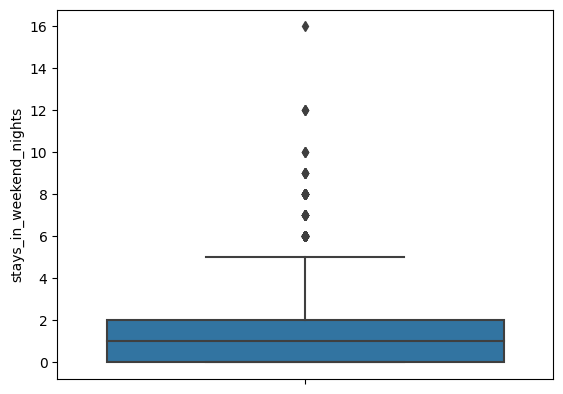

In [ ]:
sns.boxplot(y=df.stays_in_weekend_nights)
plt.show()

In [ ]:
df_atipico = df[df['stays_in_weekend_nights'] >= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_weekend_nights'])


stays_in_weekend_nights  5   6   7   8   9   10  12  16
is_canceled                                            
0                        14  23   1   8   1   2   2   0
1                        28  59  12  26   5   1   1   1

In [ ]:
df_atipico = df[df['stays_in_weekend_nights'] <= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_weekend_nights'])


stays_in_weekend_nights      0     1     2    3    4   5
is_canceled                                             
0                        12872  7993  8480  315  519  14
1                        13507  7728  8690  313  409  28

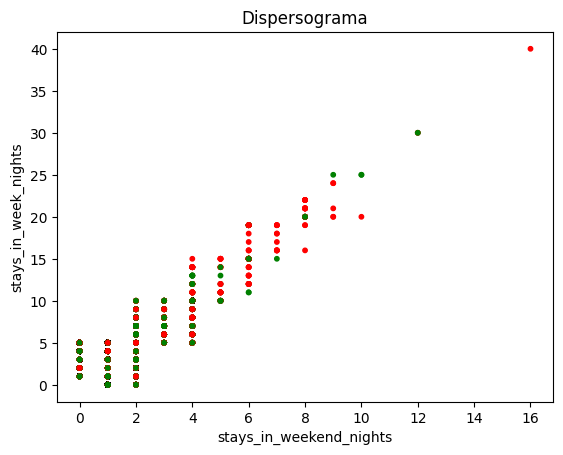

In [ ]:
col = df.is_canceled.map({0:'g', 1:'r'})
grf=df.plot.scatter(x="stays_in_weekend_nights", y="stays_in_week_nights", c=col, s=10).set(title="Dispersograma",xlabel='stays_in_weekend_nights',ylabel='stays_in_week_nights') 

In [ ]:
df['assigned_equals_reserved'] = np.where(df['assigned_room_type']== df['reserved_room_type'], True, False) #creamos una nueva col para verificar el tipo de habitacion
df[df['assigned_equals_reserved']]

arrival_date         hotel  lead_time  stays_in_weekend_nights  \
0       2016-09-05    City Hotel         49                        1   
1       2015-10-31  Resort Hotel          4                        0   
2       2016-10-13    City Hotel         25                        0   
3       2016-12-12    City Hotel         26                        2   
4       2017-03-19    City Hotel        104                        2   
...            ...           ...        ...                      ...   
61906   2017-07-14    City Hotel        247                        2   
61909   2016-09-02    City Hotel          0                        0   
61910   2017-05-08    City Hotel         10                        1   
61911   2015-10-10  Resort Hotel        143                        2   
61912   2016-04-17    City Hotel         57                        2   

       stays_in_week_nights  adults  children  babies meal country  ...  \
0                         2       1         0       0   BB     USA  ...   
1                         1       2         0       0   BB     PRT  ...   
2                         1       2         2       0   BB     CHE  ...   
3                         5       2         0       0   BB     PRT  ...   
4                         5       2         0       0   BB     FRA  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
61906                     5       2         1       0   BB     NLD  ...   
61909                     1       1         0       0   SC     FRA  ...   
61910                     2       1         0       0   BB     FRA  ...   
61911                     5       2         0       0   BB     PRT  ...   
61912                     5       2         0       0   HB     ISR  ...   

      deposit_type  agent  days_in_waiting_list    customer_type  \
0       No Deposit    9.0                     0        Transient   
1       No Deposit    9.0                     0        Transient   
2       No Deposit    9.0                     0        Transient   
3       Non Refund  154.0                     0        Transient   
4       No Deposit   20.0                     0  Transient-Party   
...            ...    ...                   ...              ...   
61906   No Deposit    9.0                     0        Transient   
61909   No Deposit    9.0                     0        Transient   
61910   No Deposit    9.0                     0        Transient   
61911   Non Refund   96.0                     0        Transient   
61912   No Deposit    9.0                     0        Transient   

       average_daily_rate required_car_parking_spaces  \
0                  115.50                           0   
1                   42.00                           1   
2                  229.00                           0   
3                   75.00                           0   
4                   75.00                           0   
...                   ...                         ...   
61906              125.10                           0   
61909              149.00                           0   
61910               95.00                           0   
61911               36.05                           0   
61912              143.29                           0   

      total_of_special_requests                                    id  \
0                             1  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689   
1                             0  b1428f80-c56c-4ae4-91a9-6962edae08b1   
2                             2  2226c018-ea20-4c4e-8f71-ea66aee70d7c   
3                             0  314f56dc-2e4d-4298-9bdd-27bb008bffff   
4                             1  28c75445-c603-413a-babf-ad377018b592   
...                         ...                                   ...   
61906                         1  8a4d1423-1343-4e9f-a6df-68adf4d173bf   
61909                         0  cc922a1c-356e-42a5-a984-0b1af03c2f5c   
61910                         0  76fb0e83-59df-43ee-9c33-aec51030ed45   
61911   

In [ ]:
df['assigned_equals_reserved']=df['assigned_equals_reserved'].astype(int)
temporada_alta = [1,6,7,8,12]
df['temporada_alta'] = pd.DatetimeIndex(df['arrival_date']).month.isin(temporada_alta)
df['temporada_alta'] = df['temporada_alta'] .astype(int)

# CHECKPOINT 2


Aca arrancamos con arboles :)


In [ ]:
dataset = df.copy()

In [ ]:
target='is_canceled'

In [ ]:
#Verifico balanceo de clases
dataset[target].value_counts(normalize=True)*100

1    50.450746
0    49.549254
Name: is_canceled, dtype: float64

In [ ]:
df['assigned_equals_reserved']=df['assigned_equals_reserved'].astype(int)

In [ ]:
#APLICAMOS ONE HOT ENCODING DADO QUE HAY VARIABLES CUALITATIVAS
dataset = pd.get_dummies(dataset, columns=["hotel","meal","deposit_type","customer_type","country"], drop_first=True)
dataset.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled', 'assigned_equals_reserved', 'temporada_alta',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL',
       'country_ISR', 'country_ITA', 'country_NLD', 'country_NOR',
       'countr

In [ ]:
dataset

arrival_date  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0       2016-09-05         49                        1                     2   
1       2015-10-31          4                        0                     1   
2       2016-10-13         25                        0                     1   
3       2016-12-12         26                        2                     5   
4       2017-03-19        104                        2                     5   
...            ...        ...                      ...                   ...   
61908   2017-01-27         24                        0                     2   
61909   2016-09-02          0                        0                     1   
61910   2017-05-08         10                        1                     2   
61911   2015-10-10        143                        2                     5   
61912   2016-04-17         57                        2                     5   

       adults  children  babies market_segment distribution_channel  \
0           1         0       0      Online TA                TA/TO   
1           2         0       0         Groups               Direct   
2           2         2       0      Online TA                TA/TO   
3           2         0       0         Groups                TA/TO   
4           2         0       0  Offline TA/TO                TA/TO   
...       ...       ...     ...            ...                  ...   
61908       2         0       0      Online TA                TA/TO   
61909       1         0       0      Online TA                TA/TO   
61910       1         0       0       Aviation            Corporate   
61911       2         0       0         Groups                TA/TO   
61912       2         0       0      Online TA                TA/TO   

       is_repeated_guest  ...  country_ISR  country_ITA country_NLD  \
0                      0  ...            0            0           0   
1                      0  ...            0            0           0   
2                      0  ...            0            0           0   
3                      0  ...            0            0           0   
4                      0  ...            0            0           0   
...                  ...  ...          ...          ...         ...   
61908                  0  ...            0            0           0   
61909                  0  ...            0            0           0   
61910                  0  ...            0            0           0   
61911                  0  ...            0            0           0   
61912                  0  ...            1            0           0   

      country_NOR  country_OTHER  country_POL  country_PRT  country_RUS  \
0               0              0            0            0            0   
1               0              0            0            1            0   
2               0              0            0            0            0   
3               0              0            0            1            0   
4               0              0            0            0            0   
...           ...            ...          ...          ...          ...   
61908           0              0            0            0            0   
61909           0              0            0            0            0   
61910           0              0            0            0            0   
61911           0              0            0            1            0   
61912           0              0            0            0            0   

       country_SWE  country_USA  
0                0            1  
1                0            0  
2                0            0  
3                0            0  
4                0            0  
...            ...          ...  
61908            0            0  
61909            0            0  
61910            0            0  
61911            0            0  
61912            0            0  

[61010 rows x 53 columns]

# Arbol de decision N1

In [ ]:
features1= ['hotel_Resort Hotel','meal_FB','meal_HB','meal_SC','lead_time', 'adults', 'children', 'babies', 'previous_cancellations','days_in_waiting_list']

In [ ]:
#Separo un set de Evaluacion 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset[features1].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion 

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
dataset.shape

(61010, 53)

In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol 
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 

#Conjunto de parámetros que quiero usar 
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES
               'max_depth':list(range(1,8))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=20 

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)  

#Clasificador  
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) 

#Random Search Cross Validation 
randomcv = RandomizedSearchCV(estimator=base_tree, 
                              param_distributions = params_grid,
                              scoring=scorer_fn, 
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

In [ ]:
#Mejores hiperparametros del arbol 
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) 

{'max_depth': 2, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.7088181693155654


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ 
feat_imps = best_tree.feature_importances_ 

for feat_imp,feat in sorted(zip(feat_imps,features1)): 
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

previous_cancellations: 0.4087417347305434
lead_time: 0.5912582652694567


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train) 

reglas = export_text(arbol, feature_names=list(features1)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- lead_time <= 17.50
|   |--- lead_time <= 7.50
|   |   |--- class: 0
|   |--- lead_time >  7.50
|   |   |--- class: 0
|--- lead_time >  17.50
|   |--- previous_cancellations <= 0.50
|   |   |--- class: 1
|   |--- previous_cancellations >  0.50
|   |   |--- class: 1



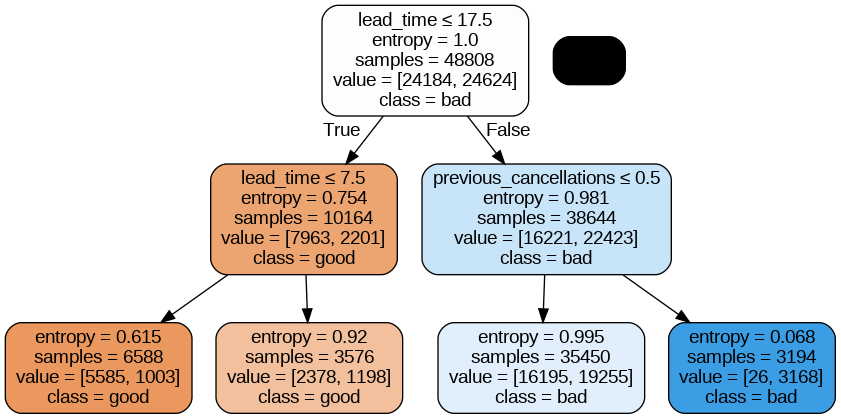

In [ ]:
from six import StringIO #IMPRIMO EL ARBOL
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features1,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = arbol.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  7563
total:  12202


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.6198164235371251
Recall: 0.9012345679012346
Precision: 0.5791836308591711
f1 score: 0.7051795360660947


In [ ]:
joblib.dump(arbol, 'arbol1.pkl')

['arbol1.pkl']

# Arbol de decision N2

In [ ]:
features2= ['lead_time','previous_cancellations','booking_changes','previous_bookings_not_canceled', 'stays_in_week_nights','days_in_waiting_list']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features2].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 

#Conjunto de parámetros que quiero usar 
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0.001,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(1,6))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=45 

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n)  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); 

In [ ]:
#Mejores hiperparametros del arbol 
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) 

{'max_depth': 4, 'criterion': 'entropy', 'ccp_alpha': 0.0012758620689655173}
0.7232810236013284


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features2)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

previous_bookings_not_canceled: 0.029053614988585347
booking_changes: 0.1505789660129004
previous_cancellations: 0.3193701271027547
lead_time: 0.5009972918957596


# Arbol de decision N3

In [ ]:
features3= ['lead_time','previous_cancellations','booking_changes', 'previous_bookings_not_canceled','days_in_waiting_list' ]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features3].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=20 

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0.001,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(2,12))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=25 

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = GridSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_grid = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_jobs=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol PROBASTE 10 DECIME CUAL FUE EL DE LA MEJOR METRICAS
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) #EL ARBOL QUE MEJOR PERFORMO TIENE ESTO, AL SER RANDOM, AL VOLVER A CORRER PUEDE QUE ME DEN OTROS, EN ESTE CASO F1, SI DA MUY BAJO PUEDO MODIFICAR MIS PARAMETRO

{'ccp_alpha': 0.0012105263157894737, 'criterion': 'entropy', 'max_depth': 7}
0.7247608968188775


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features3)): #ME DIJO CON EL ALCOHOL Y SULFATOS TE PUEDO ARMAR UN BUEN CLASIFICADOR (EL ALCOHOL TIENE BUENA CORRELACION CON EL TARGET LO VIMOS EN EL HEATMAP)
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

days_in_waiting_list: 0.022347705380516635
previous_bookings_not_canceled: 0.05058730927301071
booking_changes: 0.13794185255282132
previous_cancellations: 0.299588163951595
lead_time: 0.48953496884205633


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol, feature_names=list(features3)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- lead_time <= 17.50
|   |--- lead_time <= 7.50
|   |   |--- booking_changes <= 0.50
|   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |--- previous_bookings_not_canceled <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- previous_bookings_not_canceled >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- previous_cancellations >  0.50
|   |   |   |   |--- previous_bookings_not_canceled <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- previous_bookings_not_canceled >  2.50
|   |   |   |   |   |--- class: 0
|   |   |--- booking_changes >  0.50
|   |   |   |--- class: 0
|   |--- lead_time >  7.50
|   |   |--- previous_cancellations <= 0.50
|   |   |   |--- class: 0
|   |   |--- previous_cancellations >  0.50
|   |   |   |--- previous_bookings_not_canceled <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- previous_bookings_not_canceled >  1.50
|   |   |   |   |--- class: 0
|--- lead_time >  17.50
|   |--- previous_cancellations <= 0.50


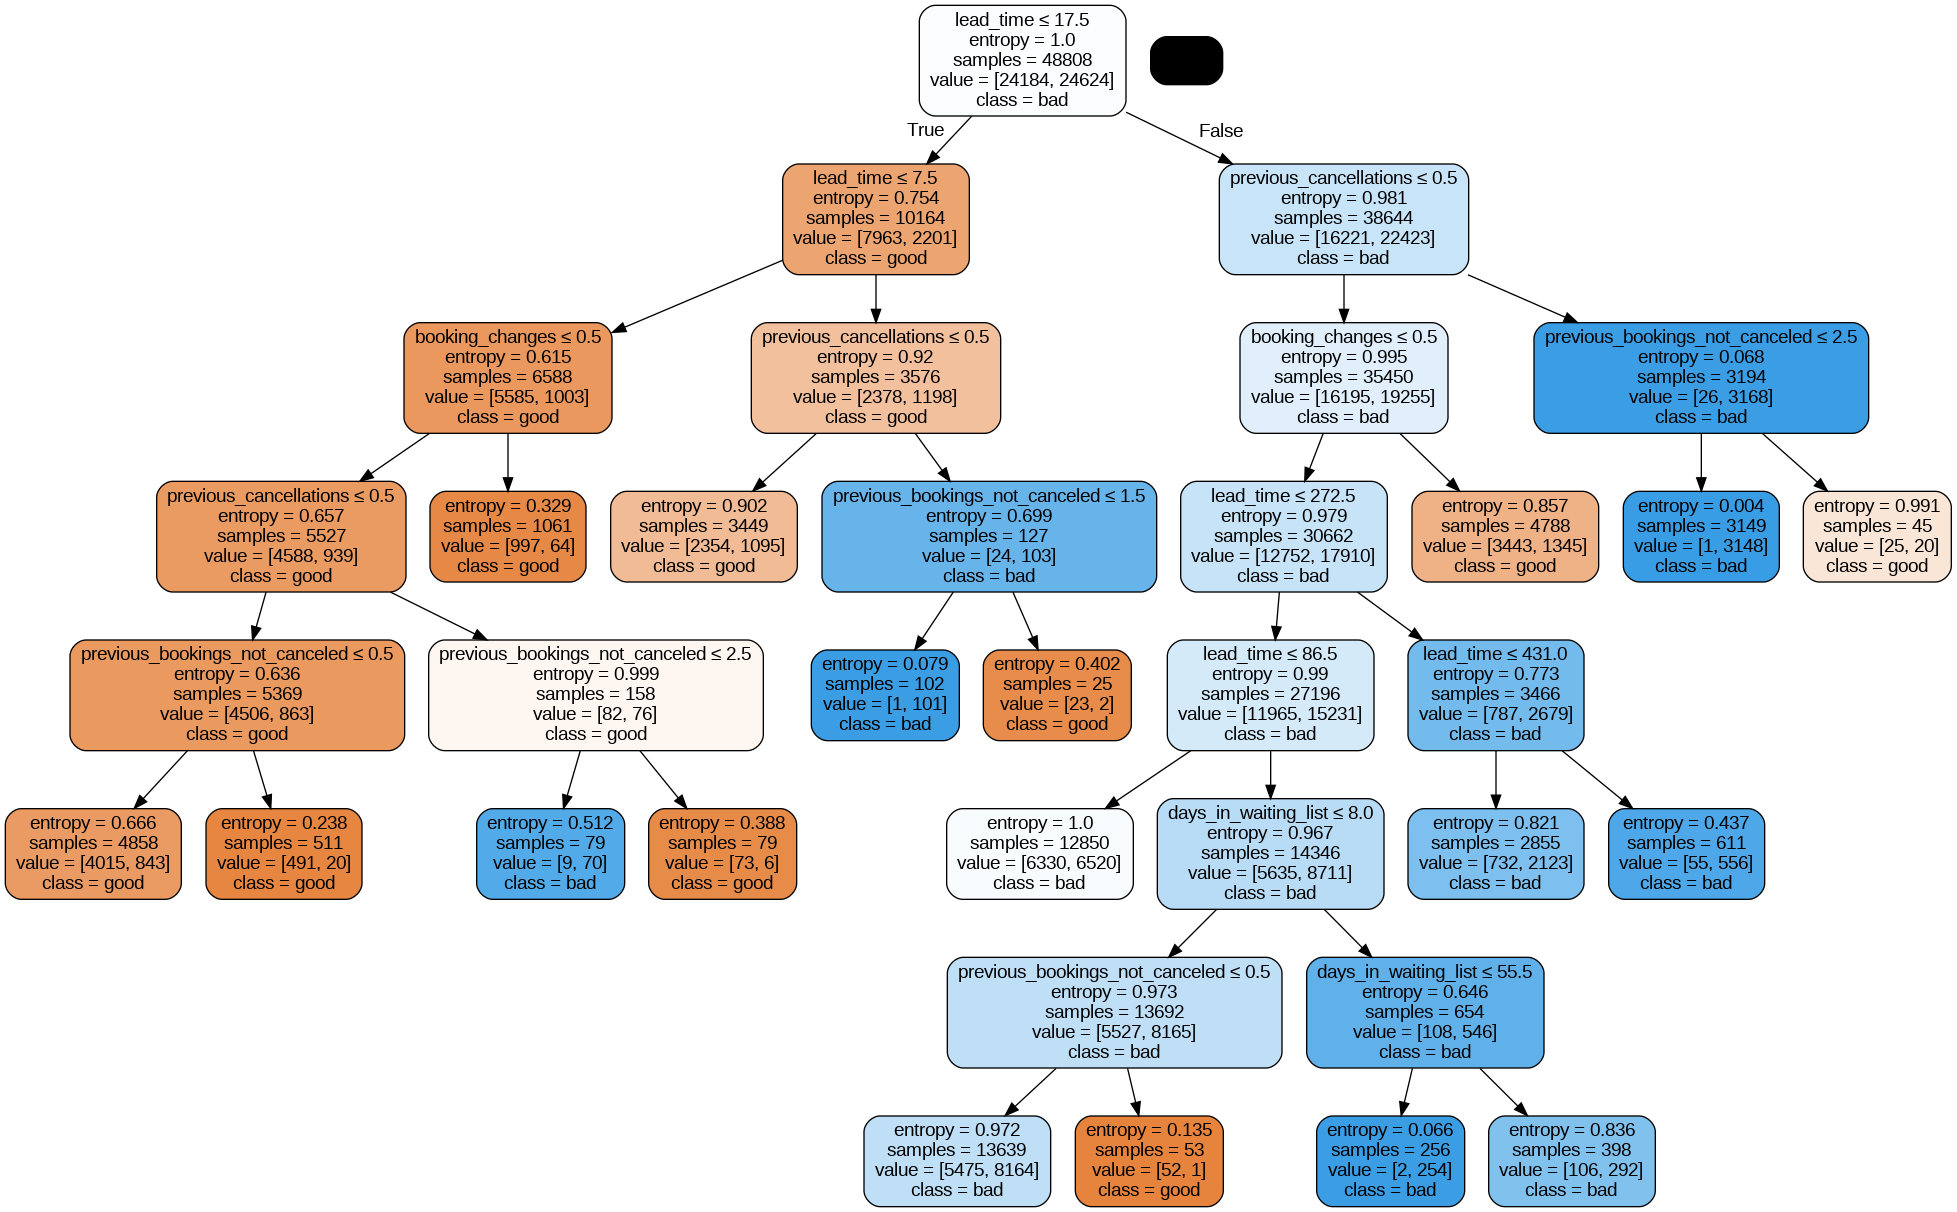

In [ ]:
from six import StringIO #IMPRIMO EL ARBOL
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features3,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#APLICAMOS ONE HOT ENCODING DADO QUE HAY VARIABLES CUALITATIVAS
df_test = pd.get_dummies(df_test, columns=["hotel","meal","deposit_type","customer_type","country"], drop_first=True)
df_test.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'country_TZA', 'country_UGA', 'country_UKR', 'country_URY',
       'country_USA', 'country_UZB', 'country_VEN', 'country_VNM',
       'country_ZAF', 'country_ZWE'],
      dtype='object', length=170)

In [ ]:
columnas = {"adr": "average_daily_rate", "arrival_date_year":"year", "arrival_date_month":"month", "arrival_date_day_of_month":"day"} #cambiar nombres a las categorias
df_test.rename(columns = columnas, inplace = True)

In [ ]:
df_test = df_test.drop(columns=['arrival_date_week_number'])


In [ ]:
df_test.month = df_test.month.map(months)

In [ ]:
arrivaldates = df_test.copy() 

date=arrivaldates.apply(lambda x: datetime.date(int(x['year']), x['month'], x['day']),axis=1)

date = pd.to_datetime(date)

df_test = df_test.drop(columns=['year', 'month', 'day'])

df_test.insert(0, 'arrival_date', date)

In [ ]:
df_test.dtypes

arrival_date               datetime64[ns]
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
                                ...      
country_UZB                         uint8
country_VEN                         uint8
country_VNM                         uint8
country_ZAF                         uint8
country_ZWE                         uint8
Length: 167, dtype: object

In [ ]:
prueba = df_test.copy()

In [ ]:
filas_totales=df_test.shape[0]
print(df_test.isna().sum()/filas_totales*100) 

arrival_date               0.0
lead_time                  0.0
stays_in_weekend_nights    0.0
stays_in_week_nights       0.0
adults                     0.0
                          ... 
country_UZB                0.0
country_VEN                0.0
country_VNM                0.0
country_ZAF                0.0
country_ZWE                0.0
Length: 167, dtype: float64


In [ ]:
df_test= df_test.drop(columns=['company'])

In [ ]:
moda = df_test['agent'].mode() #decidimos calcular la moda (el valor con mayor freuencia)
moda

0    9.0
Name: agent, dtype: float64

In [ ]:
moda = df_test['agent'].mode() #decidimos calcular la moda (el valor con mayor freuencia)
df_test['agent'] = df_test['agent'].fillna(9.0) #Cambiamos los datos faltantes por la moda, dado que es el que mas se repite y poder afectar menos nuestra distribucion

In [ ]:
prueba = df_test[['lead_time','previous_cancellations','booking_changes', 'previous_bookings_not_canceled', 'days_in_waiting_list' ]]

In [ ]:
y_pred = arbol.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.6716112112768399
Recall: 0.8542884990253411
Precision: 0.6283904887083284
f1 score: 0.7241308089500861


In [ ]:
predicciones = arbol.predict(prueba)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
predicciones

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
predicciones.size

26535

In [ ]:
df_test.shape

(26535, 166)

In [ ]:
df_test.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       ...
       'country_TZA', 'country_UGA', 'country_UKR', 'country_URY',
       'country_USA', 'country_UZB', 'country_VEN', 'country_VNM',
       'country_ZAF', 'country_ZWE'],
      dtype='object', length=166)

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones})
df_submission.head()
df_submission.shape


(26535, 2)

In [ ]:
df_submission.to_csv('/content/submissions/submission_v3.csv', index=False)

OSError: ignored

#Arbol de decision N4

In [ ]:
dataset.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled', 'assigned_equals_reserved', 'temporada_alta',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL',
       'country_ISR', 'country_ITA', 'country_NLD', 'country_NOR',
       'countr

In [ ]:
features4= ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC']

In [ ]:
df_test.drop(df_test[df_test['market_segment']=='Undefined'].index, axis='index',inplace=True)

In [ ]:
df_test.drop(df_test[df_test['distribution_channel']=='Undefined'].index, axis='index',inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features4].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 #LE PIDO QUE ME ARME 20 COMB POR CADA SPLIT(ENTRENA 20 ARBOLES POR CADA SPLIT)

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(10,18))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=40 #IGUAL QUE EN EL DIBUJO CUANTAS CECES LO QUIERO PARTIR Y ENTRENAR

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) #5 FOLDS ESTRATIFICADOS RESPETE LA PROPORCION DE LA CLASE, EN LA MISMA PROPORCION ORIGINAL 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol PROBASTE 10 DECIME CUAL FUE EL DE LA MEJOR METRICAS
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 16, 'criterion': 'entropy', 'ccp_alpha': 0.0001724137931034483}
0.7471466865582921


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features4)): #ME DIJO CON EL ALCOHOL Y SULFATOS TE PUEDO ARMAR UN BUEN CLASIFICADOR (EL ALCOHOL TIENE BUENA CORRELACION CON EL TARGET LO VIMOS EN EL HEATMAP)
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

children: 0.0008095589208946217
is_repeated_guest: 0.001503058686841111
meal_FB: 0.002559605024584159
meal_SC: 0.007029384936715353
stays_in_weekend_nights: 0.009990176332835015
hotel_Resort Hotel: 0.012673140487803018
meal_HB: 0.013934890215187101
adults: 0.01418776668232521
previous_bookings_not_canceled: 0.016990469590513715
days_in_waiting_list: 0.022393948404659195
stays_in_week_nights: 0.028927925941237446
booking_changes: 0.07581475231583591
required_car_parking_spaces: 0.09540578131135771
previous_cancellations: 0.11553254076908408
average_daily_rate: 0.11878564270751116
total_of_special_requests: 0.16446119288915856
lead_time: 0.29900016478345665


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol4 =DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol4.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol4, feature_names=list(features4)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- lead_time <= 17.50
|   |--- required_car_parking_spaces <= 0.50
|   |   |--- lead_time <= 7.50
|   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |--- booking_changes <= 0.50
|   |   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |   |--- previous_bookings_not_canceled <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 0.50
|   |   |   |   |   |   |   |   |--- average_daily_rate <= 18.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- average_daily_rate >  18.50
|   |   |   |   |   |   |   |   |   |--- meal_HB <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- average_daily_rate <= 52.40
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- average_daily_rate >  52.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- meal_HB >  0.50
|   |   |   |   |   |   |   |   |   |   |--- average_d

In [ ]:
y_pred = arbol4.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7585641698082282
Recall: 0.6829109811565952
Precision: 0.8087726048480185
f1 score: 0.7405319711115026


In [ ]:
prueba4 = df_test[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC']]

In [ ]:
predicciones4 = arbol4.predict(prueba4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
predicciones4

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones4})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
#df_submission.to_csv('/content/submissions/submission_v4.csv', index=False)

In [ ]:
joblib.dump(arbol4, 'arbol4.pkl')

['arbol4.pkl']

# Arbol de decision N5

In [ ]:
dataset.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled', 'assigned_equals_reserved', 'temporada_alta',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL',
       'country_ISR', 'country_ITA', 'country_NLD', 'country_NOR',
       'countr

In [ ]:
features5= ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC','deposit_type_Non Refund', 'deposit_type_Refundable']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features5].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 #LE PIDO QUE ME ARME 20 COMB POR CADA SPLIT(ENTRENA 20 ARBOLES POR CADA SPLIT)

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(10,22))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=40 #IGUAL QUE EN EL DIBUJO CUANTAS CECES LO QUIERO PARTIR Y ENTRENAR

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) #5 FOLDS ESTRATIFICADOS RESPETE LA PROPORCION DE LA CLASE, EN LA MISMA PROPORCION ORIGINAL 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol PROBASTE 10 DECIME CUAL FUE EL DE LA MEJOR METRICAS
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) #0.7555114548598617 antes teniamos este con prfundidad 14

{'max_depth': 19, 'criterion': 'entropy', 'ccp_alpha': 0.0001724137931034483}
0.7629713266481171


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features5)): #ME DIJO CON EL ALCOHOL Y SULFATOS TE PUEDO ARMAR UN BUEN CLASIFICADOR (EL ALCOHOL TIENE BUENA CORRELACION CON EL TARGET LO VIMOS EN EL HEATMAP)
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

deposit_type_Refundable: 0.0010085556687075379
meal_FB: 0.00201145629872003
children: 0.0021713918517319852
is_repeated_guest: 0.00294020258664939
stays_in_weekend_nights: 0.005525124161706658
days_in_waiting_list: 0.009812321217191534
adults: 0.010395024829737781
meal_HB: 0.010435470213196388
previous_bookings_not_canceled: 0.01072333737795996
meal_SC: 0.011292081430688479
stays_in_week_nights: 0.015121328671475061
hotel_Resort Hotel: 0.01886491920259837
booking_changes: 0.03192160786357273
total_of_special_requests: 0.032164689980662485
previous_cancellations: 0.06242200897374367
required_car_parking_spaces: 0.09529171373881525
average_daily_rate: 0.09847346452337942
lead_time: 0.1346539617838127
deposit_type_Non Refund: 0.44477133962565035


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol5=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol5.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol5, feature_names=list(features5)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- required_car_parking_spaces <= 0.50
|   |   |--- lead_time <= 8.50
|   |   |   |--- booking_changes <= 0.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- lead_time <= 0.50
|   |   |   |   |   |   |--- average_daily_rate <= 18.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- average_daily_rate >  18.50
|   |   |   |   |   |   |   |--- meal_HB <= 0.50
|   |   |   |   |   |   |   |   |--- average_daily_rate <= 57.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- average_daily_rate >  57.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- meal_HB >  0.50
|   |   |   |   |   |   |   |   |--- average_daily_rate <= 103.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- average_daily_rate >  103.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- lead_ti

In [ ]:
df_test.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       ...
       'country_TZA', 'country_UGA', 'country_UKR', 'country_URY',
       'country_USA', 'country_UZB', 'country_VEN', 'country_VNM',
       'country_ZAF', 'country_ZWE'],
      dtype='object', length=166)

In [ ]:
y_pred = arbol5.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7727421734141944
Recall: 0.7028914879792073
Precision: 0.820906848795295
f1 score: 0.7573291327557539


In [ ]:
prueba5 = df_test[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable']]

In [ ]:
predicciones5 = arbol5.predict(prueba5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
predicciones5

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones5})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_v5.csv', index=False)

In [ ]:
joblib.dump(arbol5, 'arbol5.pkl')

['arbol5.pkl']

# Arbol de decision N6

In [ ]:
dataset.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled', 'assigned_equals_reserved', 'temporada_alta',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL',
       'country_ISR', 'country_ITA', 'country_NLD', 'country_NOR',
       'countr

In [ ]:
features6= ['deposit_type_Non Refund', 'lead_time','average_daily_rate','assigned_equals_reserved','previous_cancellations', 'required_car_parking_spaces', 'booking_changes','stays_in_week_nights','adults', 'hotel_Resort Hotel','total_of_special_requests']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features6].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 #LE PIDO QUE ME ARME 20 COMB POR CADA SPLIT(ENTRENA 20 ARBOLES POR CADA SPLIT)

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(9,15))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=40 #IGUAL QUE EN EL DIBUJO CUANTAS CECES LO QUIERO PARTIR Y ENTRENAR

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) #5 FOLDS ESTRATIFICADOS RESPETE LA PROPORCION DE LA CLASE, EN LA MISMA PROPORCION ORIGINAL 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol PROBASTE 10 DECIME CUAL FUE EL DE LA MEJOR METRICAS
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) #0.7555114548598617 antes teniamos este con prfundidad 14

{'max_depth': 12, 'criterion': 'gini', 'ccp_alpha': 0.0001724137931034483}
0.7462731335563475


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features6)): #ME DIJO CON EL ALCOHOL Y SULFATOS TE PUEDO ARMAR UN BUEN CLASIFICADOR (EL ALCOHOL TIENE BUENA CORRELACION CON EL TARGET LO VIMOS EN EL HEATMAP)
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

stays_in_week_nights: 0.003280790923438442
adults: 0.006355345576540714
hotel_Resort Hotel: 0.009989792669584736
booking_changes: 0.029474408414624915
total_of_special_requests: 0.04562288883256251
previous_cancellations: 0.06008901757342754
average_daily_rate: 0.06419371204049086
required_car_parking_spaces: 0.07079893735104972
assigned_equals_reserved: 0.11551903872828376
lead_time: 0.11634177939232825
deposit_type_Non Refund: 0.4783342884976686


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol6=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol6.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol6, feature_names=list(features6)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- assigned_equals_reserved <= 0.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- class: 0
|   |   |--- required_car_parking_spaces >  0.50
|   |   |   |--- class: 0
|   |--- assigned_equals_reserved >  0.50
|   |   |--- lead_time <= 11.50
|   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |--- lead_time <= 7.50
|   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |--- lead_time <= 0.50
|   |   |   |   |   |   |   |--- average_daily_rate <= 18.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- average_daily_rate >  18.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lead_time >  0.50
|   |   |   |   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |   |   |   |--- booking_changes <= 0.50
|   |   |   |   |   |   |   |   |   |--- average_daily_rate <= 99.32
|   |   |   |   |   |   |   |   |   |   |---

In [ ]:
df_test['assigned_equals_reserved'] = np.where(df_test['assigned_room_type']== df_test['reserved_room_type'], True, False) #creamos una nueva col para verificar el tipo de habitacion
df_test[df_test['assigned_equals_reserved']]

arrival_date  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0       2016-11-07        277                        1                     2   
1       2016-05-11        286                        0                     4   
2       2016-08-23          0                        0                     1   
3       2016-10-29        196                        2                     5   
4       2016-11-26        232                        2                     1   
...            ...        ...                      ...                   ...   
26530   2017-04-21         31                        2                     3   
26531   2016-09-03        130                        2                     1   
26532   2016-08-22         45                        1                     1   
26533   2017-08-10        164                        2                     4   
26534   2016-03-24        136                        0                     3   

       adults  children  babies market_segment distribution_channel  \
0           2       0.0       0         Groups                TA/TO   
1           2       0.0       0         Groups                TA/TO   
2           3       0.0       0      Online TA                TA/TO   
3           2       2.0       0      Online TA                TA/TO   
4           2       0.0       0         Groups                TA/TO   
...       ...       ...     ...            ...                  ...   
26530       2       0.0       0  Offline TA/TO                TA/TO   
26531       2       0.0       0  Offline TA/TO                TA/TO   
26532       2       0.0       0      Online TA                TA/TO   
26533       2       0.0       0  Offline TA/TO                TA/TO   
26534       2       0.0       0  Offline TA/TO                TA/TO   

       is_repeated_guest  ...  country_UGA  country_UKR country_URY  \
0                      0  ...            0            0           0   
1                      0  ...            0            0           0   
2                      0  ...            0            0           0   
3                      0  ...            0            0           0   
4                      0  ...            0            0           0   
...                  ...  ...          ...          ...         ...   
26530                  0  ...            0            0           0   
26531                  0  ...            0            0           0   
26532                  0  ...            0            0           0   
26533                  0  ...            0            0           0   
26534                  0  ...            0            0           0   

      country_USA  country_UZB  country_VEN  country_VNM  country_ZAF  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
26530           0            0            0            0            0   
26531           0            0            0            0            0   
26532           0            0            0            0            0   
26533           0            0            0            0            0   
26534           0            0            0            0            0   

       country_ZWE  assigned_equals_reserved  
0                0                      True  
1                0                      True  
2                0                      True  
3                0                      True  
4                0                      True  
...            ...                       ...  
26530            0                      True  
26531            0                      True  
26532            0                     

In [ ]:
df_test['assigned_equals_reserved'] = df_test['assigned_equals_reserved'].astype(int)

In [ ]:
y_pred = arbol6.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7593017538108506
Recall: 0.7194606887589343
Precision: 0.7854229473310871
f1 score: 0.7509961848240779


In [ ]:
prueba6 = df_test[['deposit_type_Non Refund', 'lead_time','average_daily_rate','assigned_equals_reserved','previous_cancellations', 'required_car_parking_spaces', 'booking_changes','stays_in_week_nights','adults', 'hotel_Resort Hotel','total_of_special_requests']]

In [ ]:
predicciones6 = arbol6.predict(prueba6)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


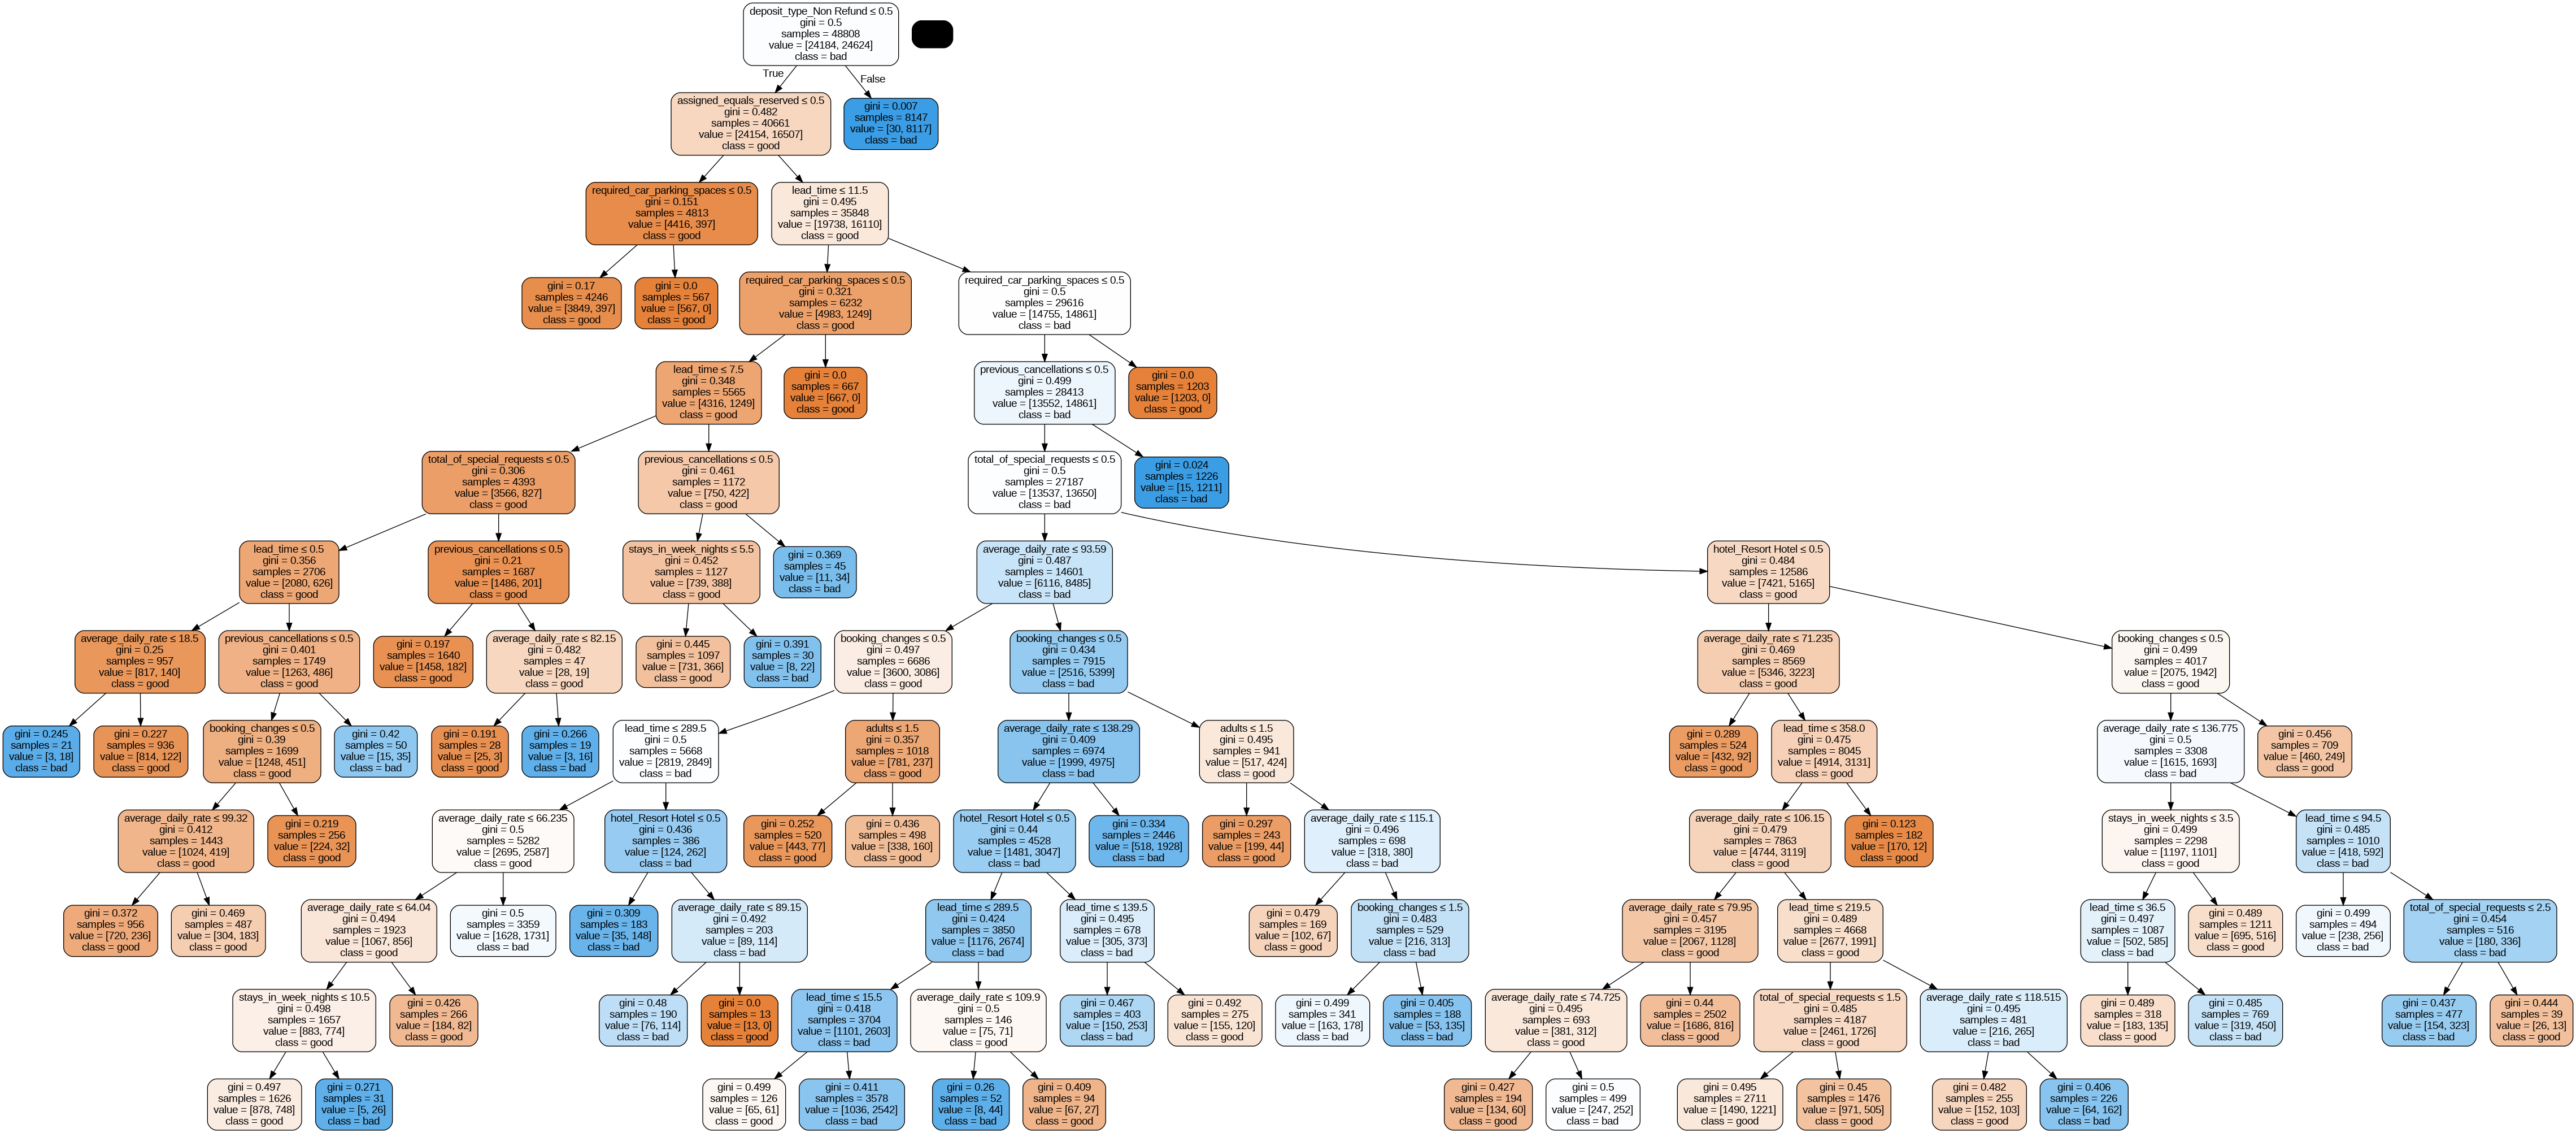

In [ ]:
from six import StringIO #IMPRIMO EL ARBOL
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol6, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features6,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones6})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_v6.csv', index=False)

In [ ]:
joblib.dump(arbol6, 'arbol6.pkl')

['arbol6.pkl']

#Arbol de decision N7

In [ ]:
features7= ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable','assigned_equals_reserved']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features7].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 #LE PIDO QUE ME ARME 20 COMB POR CADA SPLIT(ENTRENA 20 ARBOLES POR CADA SPLIT)

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(9,15))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=40 #IGUAL QUE EN EL DIBUJO CUANTAS CECES LO QUIERO PARTIR Y ENTRENAR

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) #5 FOLDS ESTRATIFICADOS RESPETE LA PROPORCION DE LA CLASE, EN LA MISMA PROPORCION ORIGINAL 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 13, 'criterion': 'gini', 'ccp_alpha': 0.0005172413793103448}
0.7423231503301053


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features7)): 
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

adults: 0.004923877765887305
meal_SC: 0.006437061910803632
meal_HB: 0.0073269366601105956
hotel_Resort Hotel: 0.011383594150336766
booking_changes: 0.027964809447522374
total_of_special_requests: 0.043484154414461074
average_daily_rate: 0.04845610190805208
previous_cancellations: 0.05725980488177938
required_car_parking_spaces: 0.07153932652625895
lead_time: 0.1135710322308883
assigned_equals_reserved: 0.11820347195152354
deposit_type_Non Refund: 0.4894498281523759


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol7=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol7.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol7, feature_names=list(features7)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- assigned_equals_reserved <= 0.50
|   |   |--- class: 0
|   |--- assigned_equals_reserved >  0.50
|   |   |--- lead_time <= 11.50
|   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |--- lead_time <= 7.50
|   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- lead_time >  7.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- required_car_parking_spaces >  0.50
|   |   |   |   |--- class: 0
|   |   |--- lead_time >  11.50
|   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |--- average_daily_rate <= 93.59
|   |   |   |   |   |   |   |--- booking_changes <= 0.50
|   |   |   |   |   |   |   |   |--- meal_SC <= 0.50
|   |   |   |   |   

In [ ]:
y_pred = arbol7.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7561055564661531
Recall: 0.6799870045484081
Precision: 0.8062403697996918
f1 score: 0.7377511455763129


In [ ]:
prueba7 = df_test[['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable','assigned_equals_reserved']]

In [ ]:
predicciones7 = arbol7.predict(prueba7)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


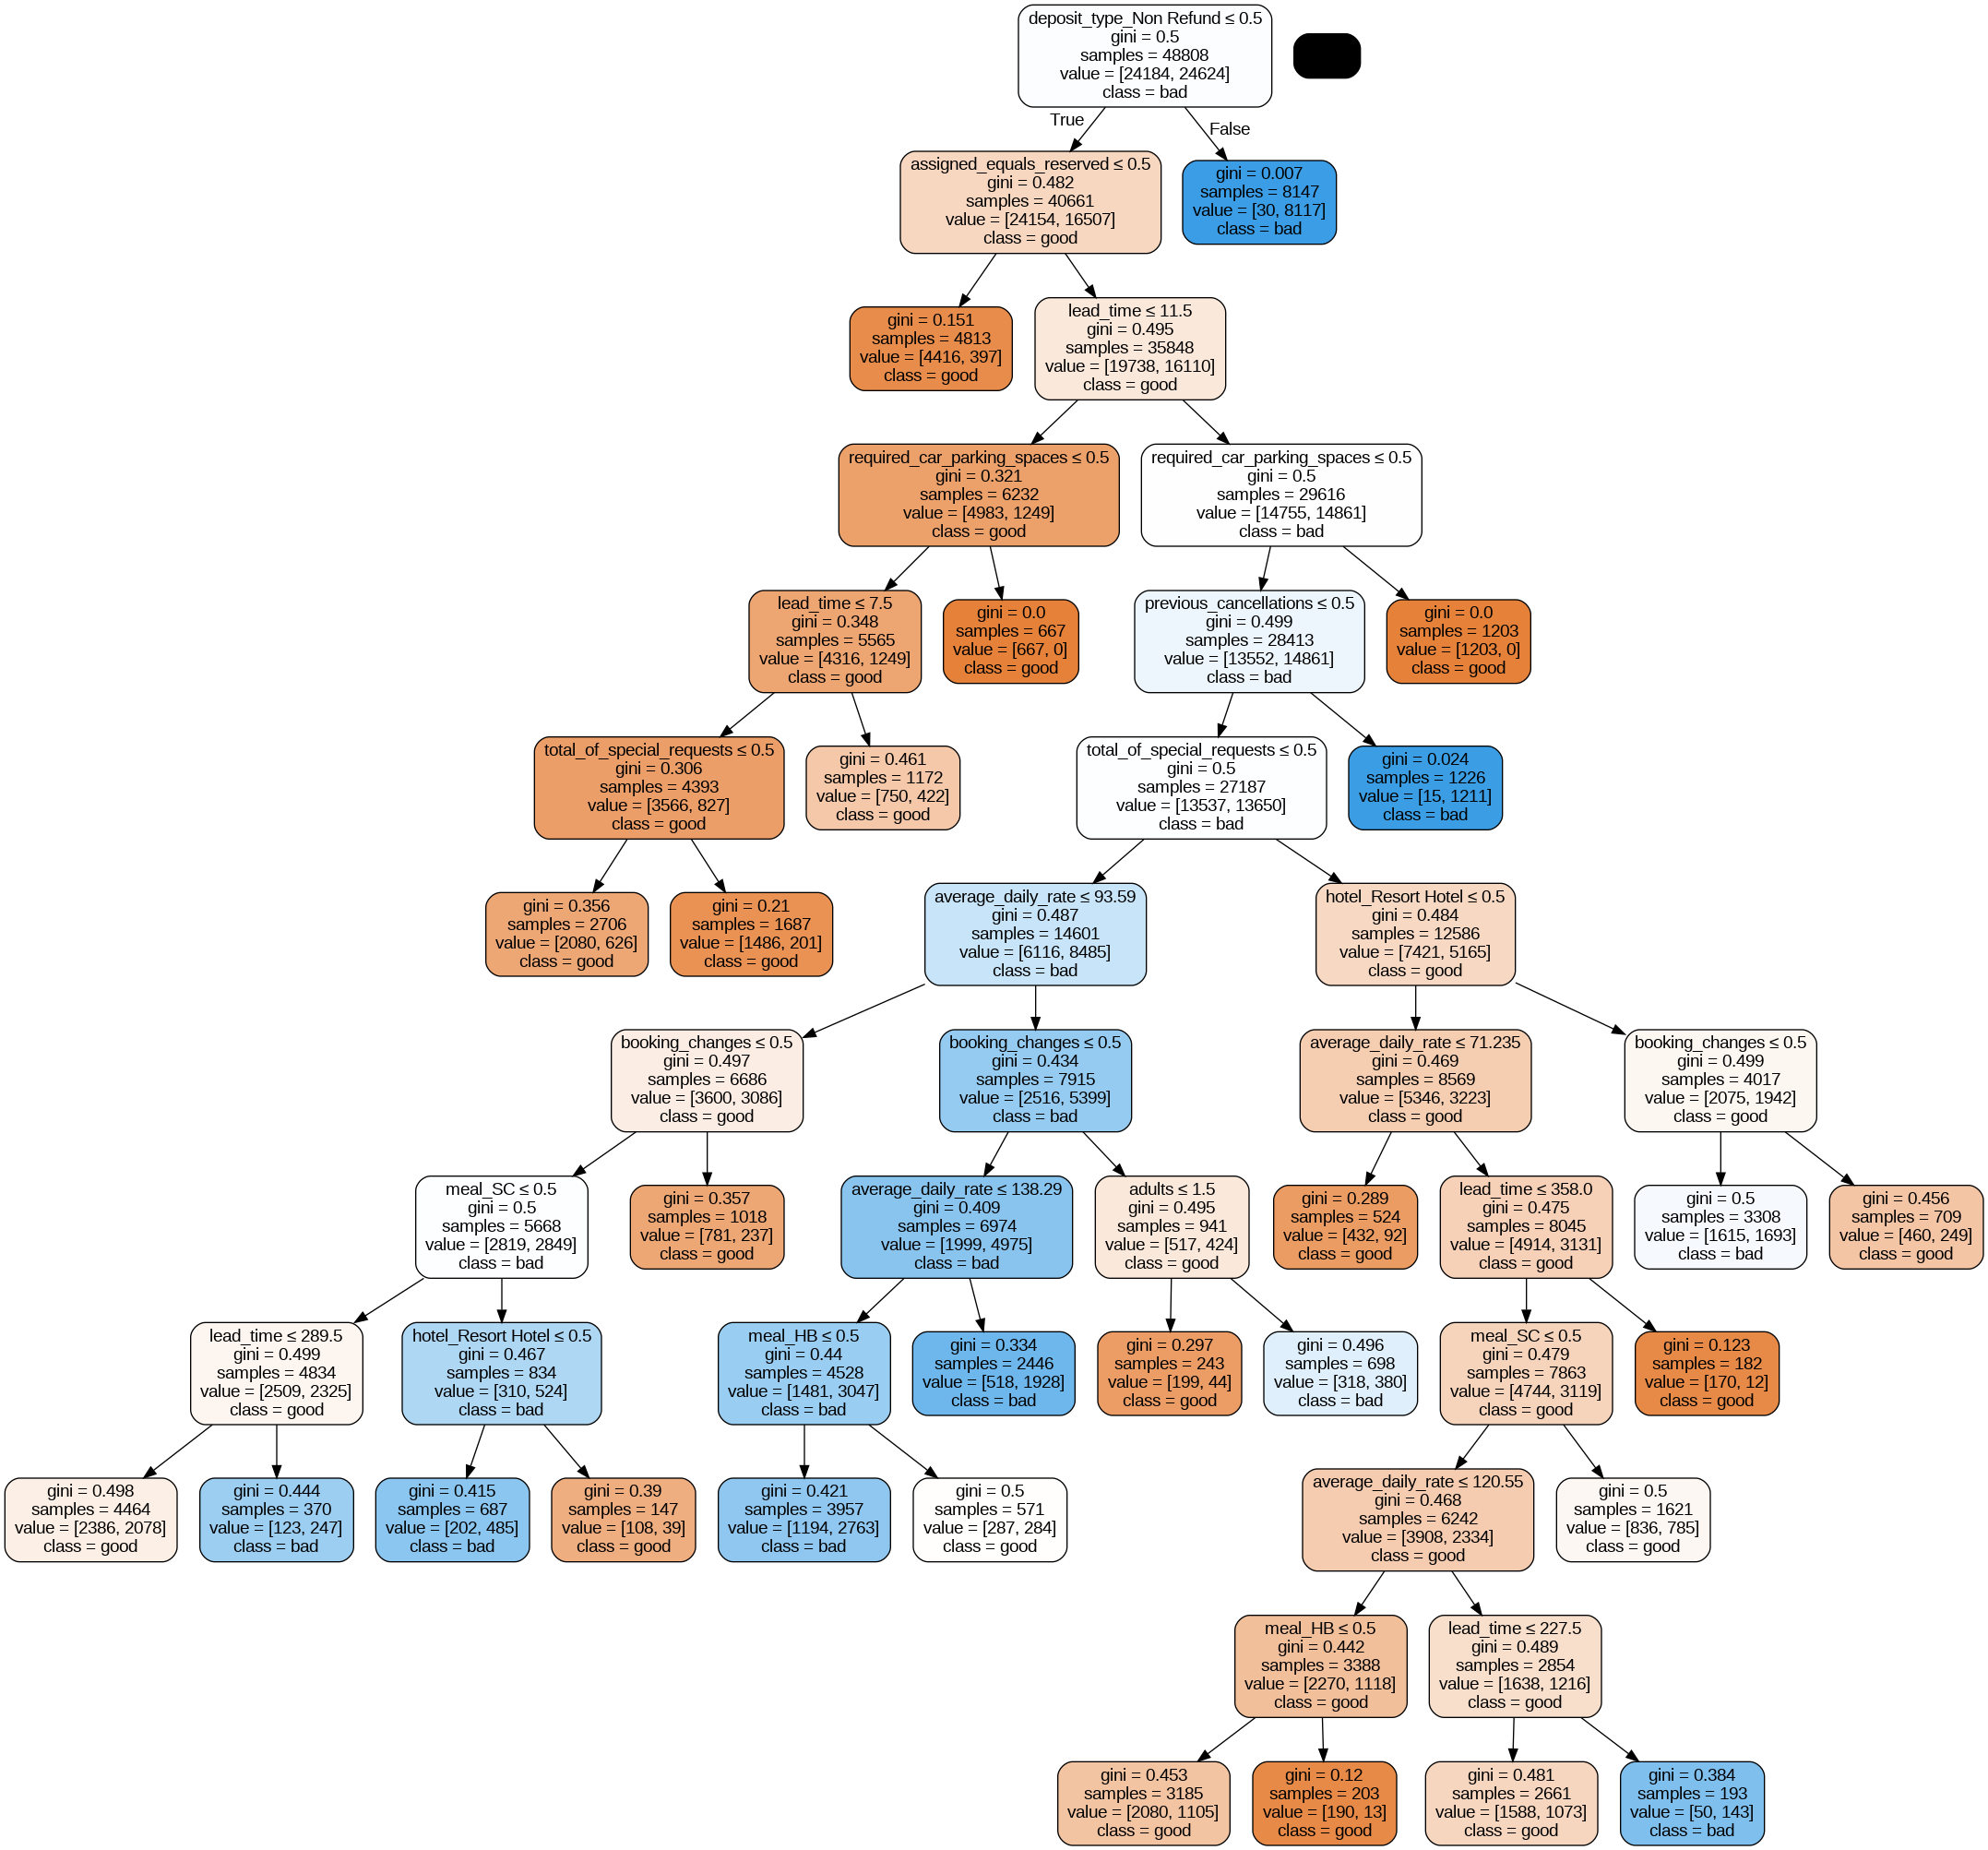

In [ ]:
from six import StringIO #IMPRIMO EL ARBOL
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol7, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features7,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones7})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_v7.csv', index=False)

In [ ]:
joblib.dump(arbol7, 'arbol7.pkl')

['arbol7.pkl']

#Arbol de decision N8

In [ ]:
features8=['lead_time',
       'stays_in_week_nights', 'adults',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'deposit_type_Non Refund','assigned_equals_reserved', 'temporada_alta']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features8].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 #LE PIDO QUE ME ARME 20 COMB POR CADA SPLIT(ENTRENA 20 ARBOLES POR CADA SPLIT)

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(9,15))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=40 #IGUAL QUE EN EL DIBUJO CUANTAS CECES LO QUIERO PARTIR Y ENTRENAR

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) #5 FOLDS ESTRATIFICADOS RESPETE LA PROPORCION DE LA CLASE, EN LA MISMA PROPORCION ORIGINAL 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol PROBASTE 10 DECIME CUAL FUE EL DE LA MEJOR METRICAS
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) #0.7555114548598617 antes teniamos este con prfundidad 14

{'max_depth': 14, 'criterion': 'gini', 'ccp_alpha': 0.0001724137931034483}
0.7518000892241757


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features8)): #ME DIJO CON EL ALCOHOL Y SULFATOS TE PUEDO ARMAR UN BUEN CLASIFICADOR (EL ALCOHOL TIENE BUENA CORRELACION CON EL TARGET LO VIMOS EN EL HEATMAP)
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

temporada_alta: 0.001403016110706197
stays_in_week_nights: 0.003182201911790524
days_in_waiting_list: 0.004568998572420829
adults: 0.00619418512777761
previous_bookings_not_canceled: 0.007521504901308601
hotel_Resort Hotel: 0.009736468998937552
booking_changes: 0.02872698896592304
total_of_special_requests: 0.044465972163032316
previous_cancellations: 0.05856526517928336
required_car_parking_spaces: 0.0690036001222508
average_daily_rate: 0.07173563051392387
assigned_equals_reserved: 0.11258967794090922
lead_time: 0.11610192197692303
deposit_type_Non Refund: 0.4662045675148131


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol8=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol8.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol8, feature_names=list(features8)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- assigned_equals_reserved <= 0.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- class: 0
|   |   |--- required_car_parking_spaces >  0.50
|   |   |   |--- class: 0
|   |--- assigned_equals_reserved >  0.50
|   |   |--- lead_time <= 11.50
|   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |--- lead_time <= 7.50
|   |   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |   |--- lead_time <= 0.50
|   |   |   |   |   |   |   |--- average_daily_rate <= 18.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- average_daily_rate >  18.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lead_time >  0.50
|   |   |   |   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |   |   |   |--- booking_changes <= 0.50
|   |   |   |   |   |   |   |   |   |--- previous_bookings_not_canceled <= 0.50
|   |   |   |   |   |   |   |   |

In [ ]:
temporada_alta = [1,6,7,8,12]
df_test['temporada_alta'] = pd.DatetimeIndex(df_test['arrival_date']).month.isin(temporada_alta)
df_test['temporada_alta'] = df_test['temporada_alta'] .astype(int)

In [ ]:
y_pred = arbol8.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7624979511555483
Recall: 0.7227095516569201
Precision: 0.7888297872340425
f1 score: 0.7543234994913529


In [ ]:
prueba8 = df_test[['lead_time',
       'stays_in_week_nights', 'adults',
       'previous_cancellations', 'previous_bookings_not_canceled','booking_changes',
        'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel',
       'deposit_type_Non Refund','assigned_equals_reserved', 'temporada_alta']]

In [ ]:
predicciones8 = arbol8.predict(prueba8)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


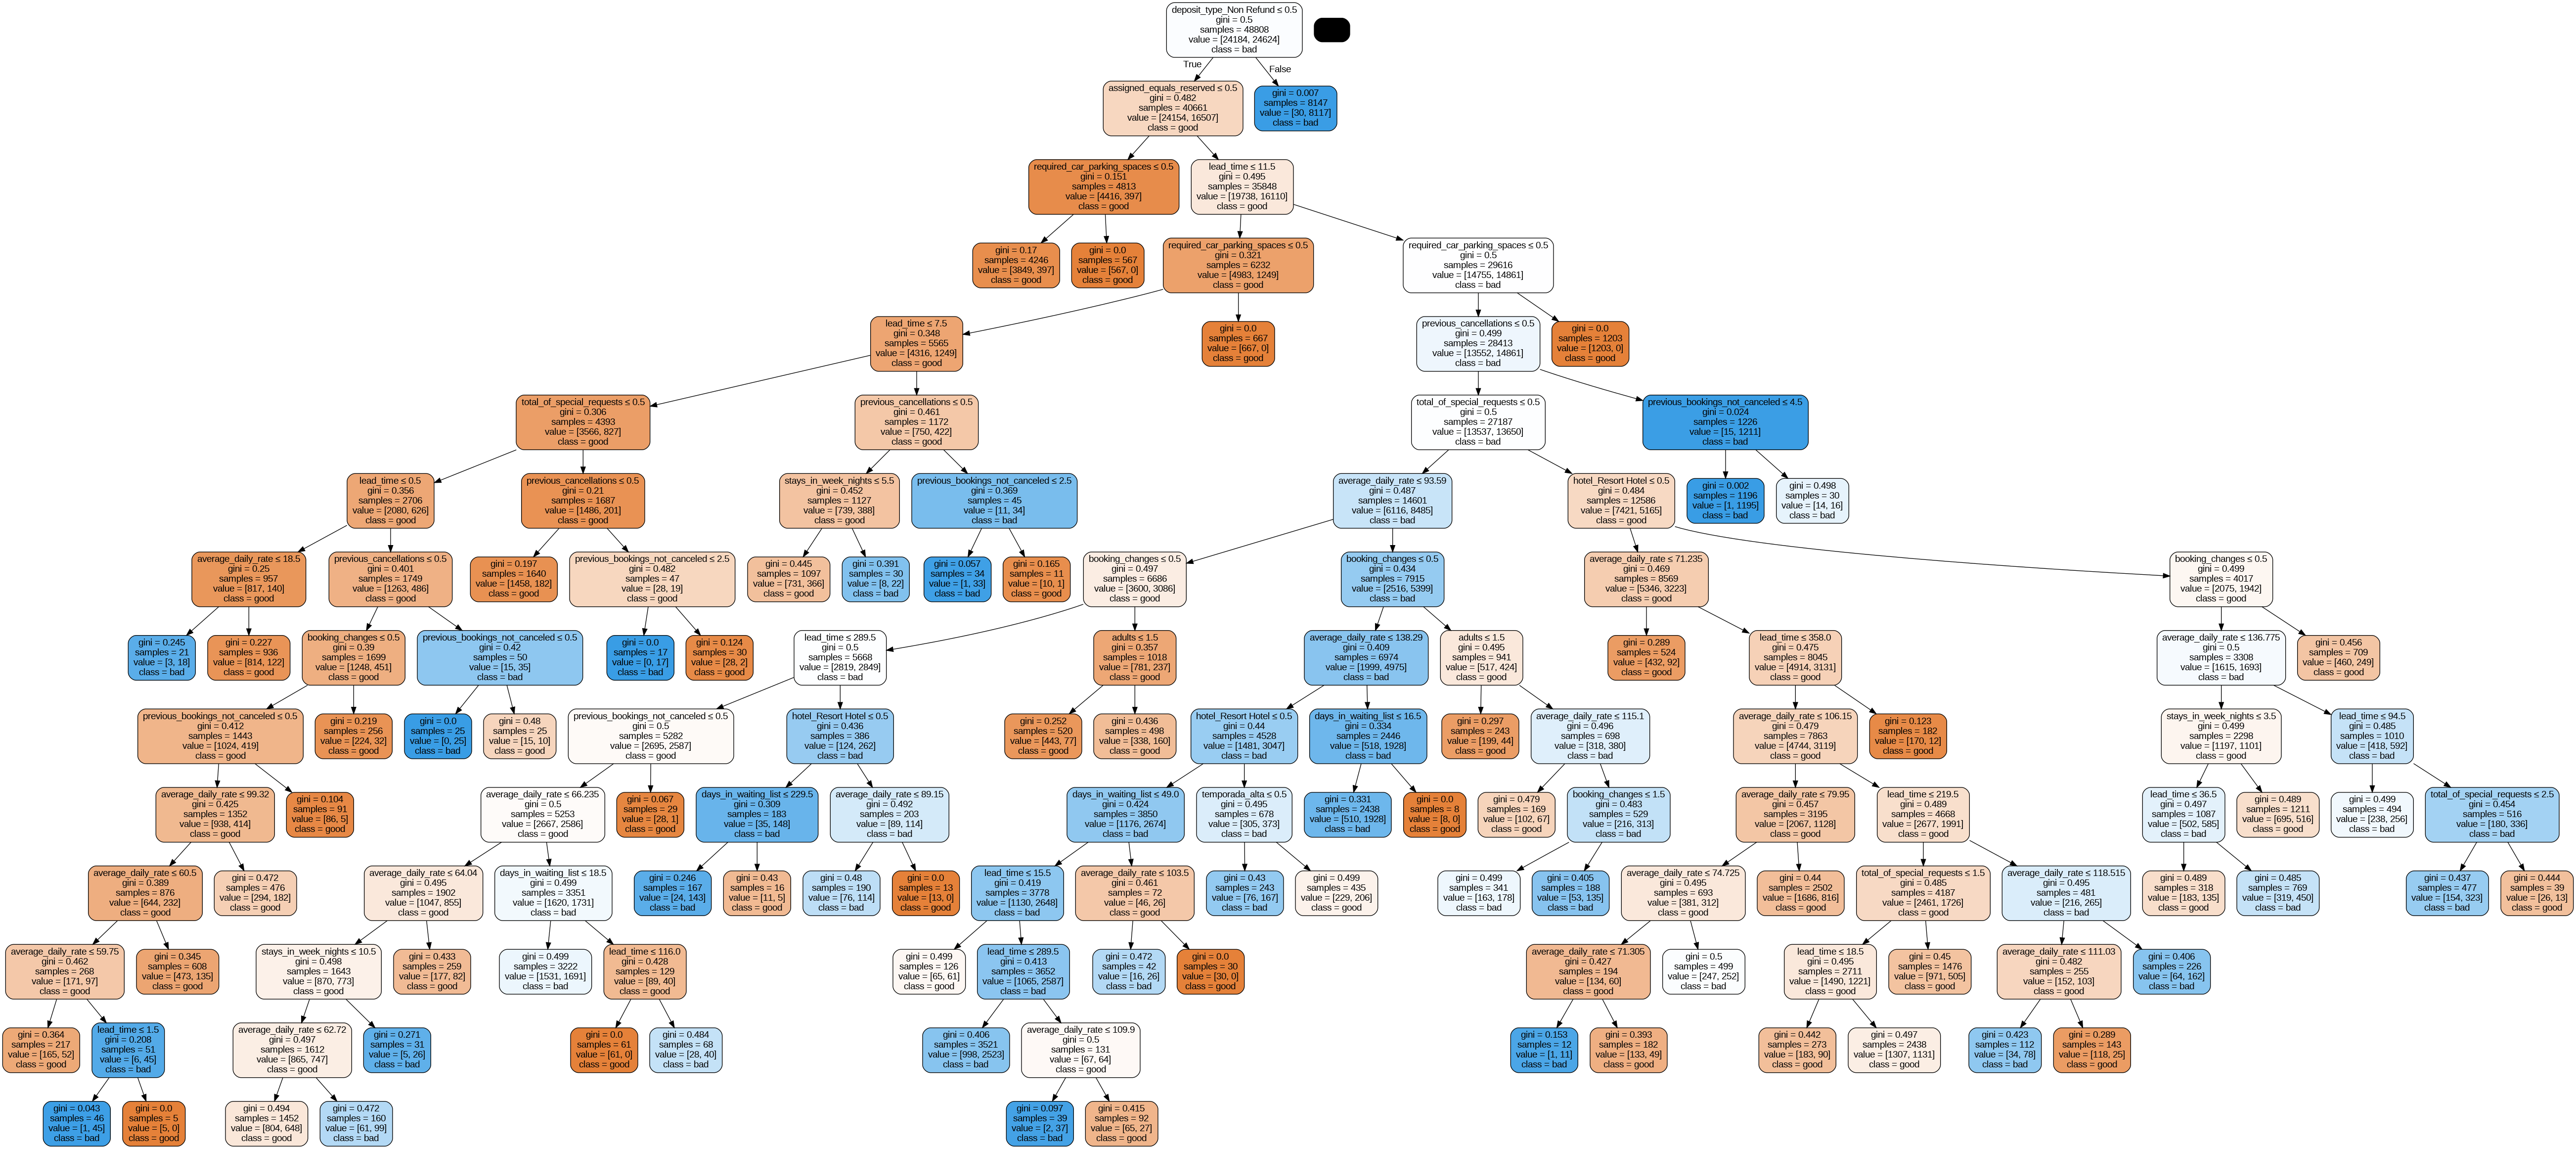

In [ ]:
from six import StringIO #IMPRIMO EL ARBOL
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol8, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features8,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones8})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_v8.csv', index=False)

In [ ]:
joblib.dump(arbol8, 'arbol8.pkl')

['arbol8.pkl']

#Arbol de decision N9

In [ ]:
dataset.columns

Index(['arrival_date', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled', 'assigned_equals_reserved', 'temporada_alta',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL',
       'country_ISR', 'country_ITA', 'country_NLD', 'country_NOR',
       'countr

In [ ]:
features9= ['deposit_type_Non Refund','lead_time','average_daily_rate','assigned_equals_reserved','previous_cancellations', 
'required_car_parking_spaces','booking_changes','stays_in_week_nights','adults','hotel_Resort Hotel','total_of_special_requests',
'customer_type_Group', 'customer_type_Transient','customer_type_Transient-Party','country_PRT', 'country_GBR',
'country_FRA','country_ESP','country_DEU']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features9].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test 80/20
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion #QUEREMOS QUE SE RESPETE LA DIST DE LAS CLASES, APRENDER DE LAS 2 CLASES

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48808
# Datos Prueba: 12202
% Positivos Entrenamiento: 50.451
% Positivos Prueba: 50.451


In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=30 #LE PIDO QUE ME ARME 20 COMB POR CADA SPLIT(ENTRENA 20 ARBOLES POR CADA SPLIT)

#Conjunto de parámetros que quiero usar GRILLA DE PARAMETROS
params_grid = {'criterion':['gini','entropy'], #LE DOY POSIBLES CRITERIOS DE PARAMETROS 
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0.001,0.005,n), #UN RANGO DE ALPHA(PODA) CON N CORTES, AUNQUE PODIA SER UN N MAYOR A 10
               'max_depth':list(range(10,22))} #RANGO DE PROFUNDIDAD
                
#Cantidad de splits para el Cross Validation
folds=40 #IGUAL QUE EN EL DIBUJO CUANTAS CECES LO QUIERO PARTIR Y ENTRENAR

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds) #5 FOLDS ESTRATIFICADOS RESPETE LA PROPORCION DE LA CLASE, EN LA MISMA PROPORCION ORIGINAL 

#Clasificador ARMO MI CLASIFICADOR 
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score) #ACA DECIDO QUE MI MEJOR CONJUNTO SEA A BSAE DE MEDIR F1 SCORE 

#Random Search Cross Validation BUSCADOR RANDOM CON VALIDACION CRUZADA
randomcv = RandomizedSearchCV(estimator=base_tree, #CREO MI VALIDACION CRUZADA con busqueda random de hiperparametros RANDOM SEARCH
                              param_distributions = params_grid,
                              scoring=scorer_fn, #METRICA QUE QUUIERO OPTIMIZAR
                              cv=kfoldcv,
                              n_iter=n) #LO TENER QUE HACER 10 VECES, PORQUE ES LA CANT DE HIPERPARAMETROS  

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train); #LO ENTRENO SOBRE MI DATASET DE ENTRENAMIENTO

In [ ]:
#Mejores hiperparametros del arbol 
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_) 

{'max_depth': 17, 'criterion': 'entropy', 'ccp_alpha': 0.0012758620689655173}
0.7913376304755115


In [ ]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_ #ME DEVUELVE MI MEJOR ARBOL
feat_imps = best_tree.feature_importances_ #AL MEJOR ARBOL LE PIDO SUS MEJORES FEATURES

for feat_imp,feat in sorted(zip(feat_imps,features9)): 
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

hotel_Resort Hotel: 0.004064312174447036
customer_type_Transient-Party: 0.008417469018179847
booking_changes: 0.011756899399145369
total_of_special_requests: 0.030410535601930806
previous_cancellations: 0.033226819142557186
average_daily_rate: 0.03718664594185886
lead_time: 0.07234795917454122
required_car_parking_spaces: 0.08332980247837111
country_PRT: 0.08969252926235621
assigned_equals_reserved: 0.09841909682357101
customer_type_Transient: 0.10525721878643467
deposit_type_Non Refund: 0.4258907121966065


In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol9=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol9.fit(x_train,y_train) #LO ENTRENO CON TODO EL SET DE ENTRENAMIENTO

reglas = export_text(arbol9, feature_names=list(features9)) #IMPRIMO TODAS LAS REGLAS
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- assigned_equals_reserved <= 0.50
|   |   |--- country_PRT <= 0.50
|   |   |   |--- class: 0
|   |   |--- country_PRT >  0.50
|   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- required_car_parking_spaces >  0.50
|   |   |   |   |--- class: 0
|   |--- assigned_equals_reserved >  0.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- lead_time <= 8.50
|   |   |   |   |--- country_PRT <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- country_PRT >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- lead_time >  8.50
|   |   |   |   |--- country_PRT <= 0.50
|   |   |   |   |   |--- customer_type_Transient <= 0.50
|   |   |   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |   |   |--- customer_type_Transient-Party <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- customer_type_Transient-Party >  0.50
|   | 

In [ ]:
y_pred = arbol9.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7957711850516309
Recall: 0.751137102014295
Precision: 0.828080229226361
f1 score: 0.7877342419080067


In [ ]:
prueba9 = df_test[['deposit_type_Non Refund', 'lead_time','average_daily_rate','assigned_equals_reserved','previous_cancellations', 'required_car_parking_spaces', 'booking_changes','stays_in_week_nights','adults', 'hotel_Resort Hotel','total_of_special_requests','customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party','country_PRT', 'country_GBR','country_FRA','country_ESP','country_DEU']]

In [ ]:
predicciones9 = arbol9.predict(prueba9)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


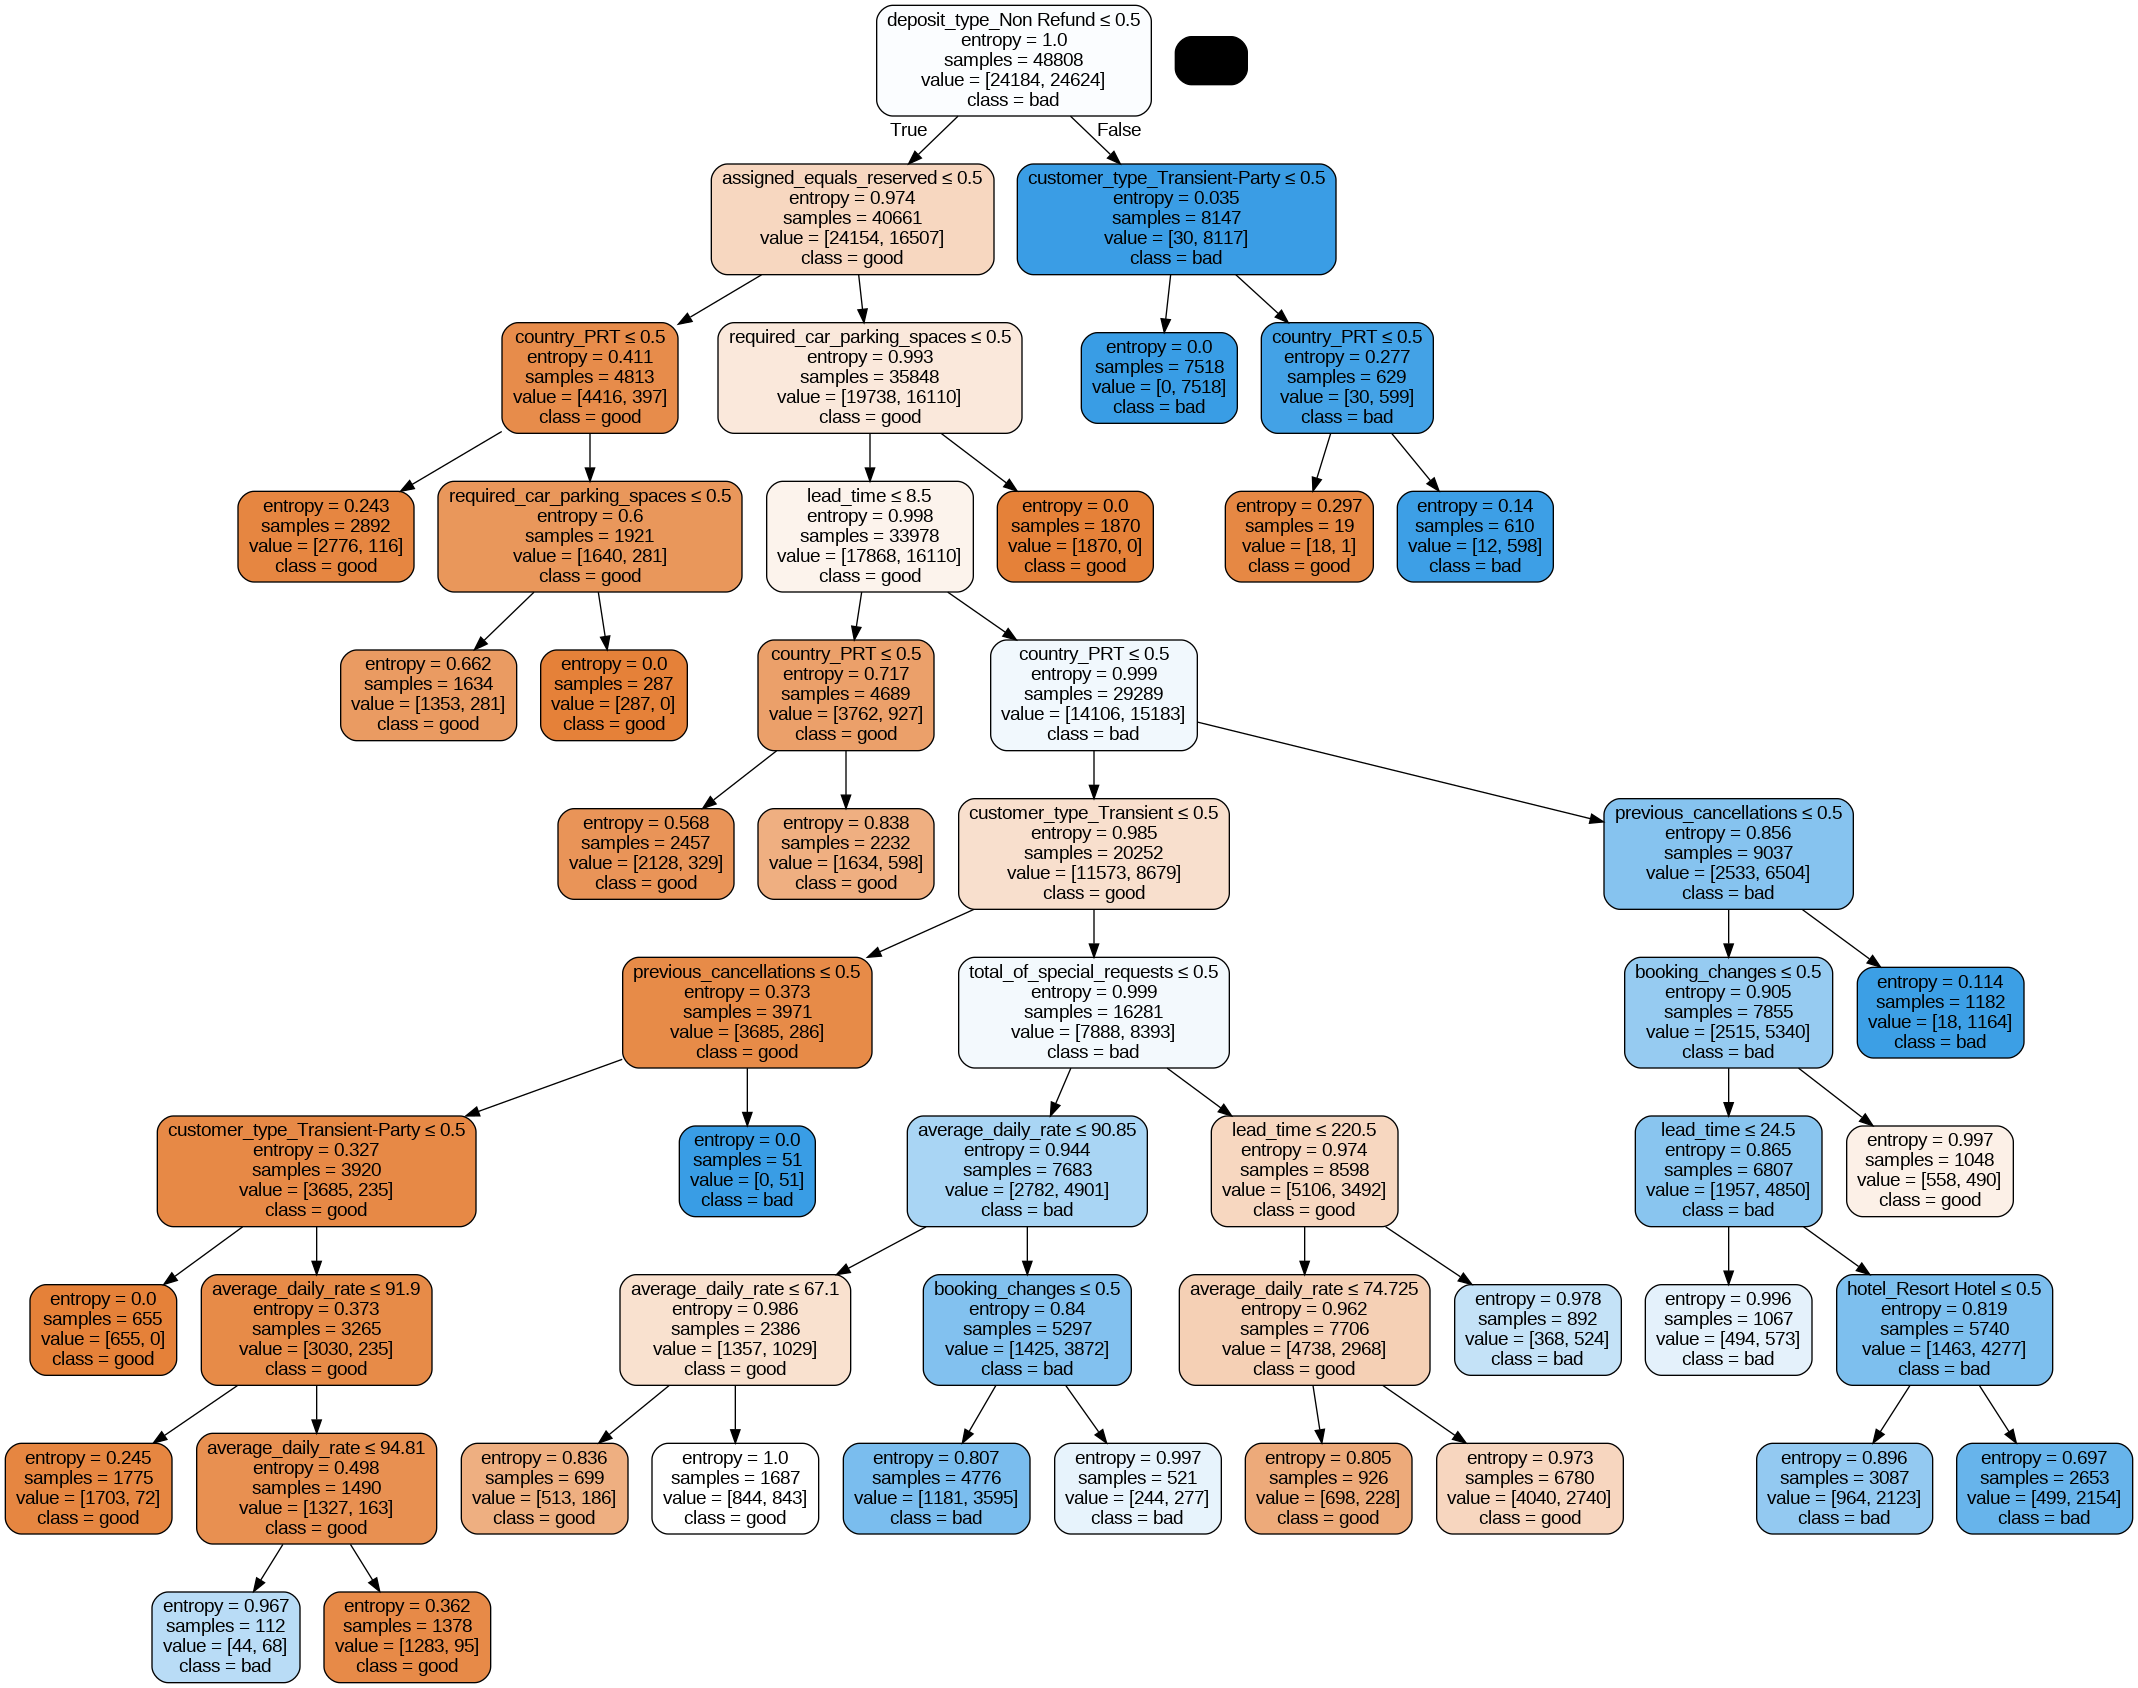

In [ ]:
from six import StringIO #IMPRIMO EL ARBOL
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol9, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features9,
                class_names=['good','bad'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones9})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_v9.csv', index=False)

# Matriz de Confusion

In [ ]:
y_pred = arbol9.predict(x_test)

Text(50.722222222222214, 0.5, 'True')

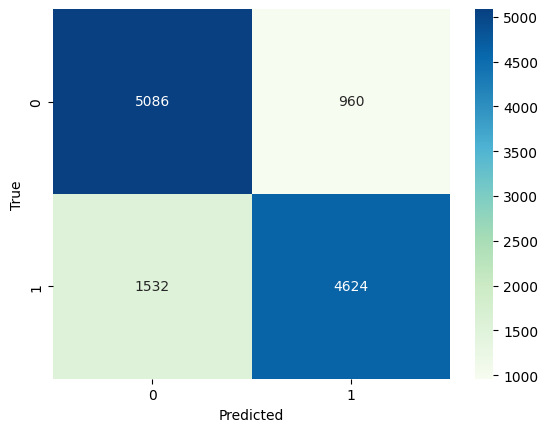

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Performance

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy)) 
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7957711850516309
Recall: 0.751137102014295
Precision: 0.828080229226361
f1 score: 0.7877342419080067


In [ ]:
joblib.dump(arbol9, 'arbol9.pkl')

['arbol9.pkl']